# EXAME FINAL LPAA - LEANDRO DANTAS LIMA (059.323.894-00)

### INSTRUÇÕES

- Junto com esta atividade serão fornecidos arquivos de dados (cotações de ativos), que você usará para desenvolver a atividade. Você deverá usar o preço de fechamento para todos eles.

1. Faça o processamento dos arquivos fornecidos. Identifique se há dados faltantes, ou dados discrepantes. Analise cada arquivo como uma série de dados, e resolva eventuais problemas que aparecerem.

Observação: Como a negociação do Bitcoin não para de funcionar até nos finais de semana, você terá mais pontos no arquivo. As outras demais cotações são para ativos que só funcionam em dias úteis. Portanto use apenas dados para dias úteis. Priorize também a menor série (série mais jovem), ou seja, se outras forem maiores, você precisa nivelá-las pela menor, e alinhá-las de acordo com as datas. Após todo o processamento, organize-os em um DataFrame.

2. Para compara todas as séries a partir da data D0, pode utilizar a seguinte equação:
```
mydata_norm = (mydata/mydata.iloc[0])*100
```
3. Para calcular  o retorno diário dos ativos utilizando o seguinte comando. Use a cotação de fechamento
```
returns = (mydata/mydata.shift(1))-1
```
4. Calcule os seguintes parâmetros relacionados a cada ativo

4.1. média de retornos anual;

4.2. Variância anual;

4.3. desvio padrão anual;

4.4. módulo da amplitude entre máxima e mínima (diária e anual) módulo da amplitude entre abertura e fechamento (diária e anual);

4.5. média de variação entre máxima e mínima diária;

4.6. média de variação entre abertura e fechamento diária;

4.7. retorno acumulado total;

4.8. retorno acumulado nos últimos 12 meses; 

4.9. retorno ano a ano;

4.10. Correlação entre os ativos;

4.11. Correlação com uma janela móvel de 45 dias;

5. Calcule quantas vezes houve Gap (espaço), que é o espaço entre o fechamento do dia anterior e a abertura do dia posterior. Determine de quanto foi esses gaps (o módulo) e a média deles por ano.

6. Calcule quantas vezes houve fechamento de Gap, ou seja, se houver gap, o fechamento do dia posterior tem que acontecer acima ou abaixo do dia anterior.

7. Apresente gráficos com subplots das correlações entre os ativos.

8. Apresente um gráfico normalizado comparando todos os ativos e usando toda a série. Faça também um gráfico do drawdown de toda a série para cada ativo. Coloque como subplots (acima os gráficos normalizados, abaixo os de drawdown).

9. Apresente um gráfico normalizado comparando todos os ativos, porém separado por anos. Ou seja, o ponto zero da série será o primeiro ponto daquele ano. Apresente também como suplot o drawdown de cada ano para cada ativo para cada janela de ano.

10. Apresente um gráfico com o histograma dos retornos de todos os ativos. Use um binning adequado.

- Faça uma tabela comparativa entre os ativos designados para você, onde deverão constar além dos parâmetros estatísticos:

i) drawdown máximo por ano;

ii) retorno por ano;

iii) desvio padrão por ano;

iv) drawdown máximo da série histórica.

### Os datasets estão na pasta "datasets_exame_final", disponíveis em:

pasta: https://canvas.instructure.com/courses/7864832/files/folder/dataset_exame_final

BTC: https://canvas.instructure.com/files/248635691/download?download_frd=1

ETH: https://canvas.instructure.com/files/248635682/download?download_frd=1

RUSSEL 2000: https://canvas.instructure.com/files/248636557/download?download_frd=1


Acesso em 23/03/2024.

Leandro: BTC/USD, ETH/USD e Russel 2000

In [1]:
# importando de bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta, date as dt_date
import calendar

In [2]:
# desativar mensagens de warnings
pd.options.mode.chained_assignment = None

In [3]:
# Carregando o arquivo CSV em um DataFrame do pandas
df_BTC = pd.read_csv('Dados Históricos - Bitcoin.csv')
df_ETH = pd.read_csv('Dados Históricos - Ethereum.csv')
df_RUT = pd.read_csv('Dados Históricos - Russell 2000.csv')

### 1. Faça o processamento dos arquivos fornecidos. Identifique se há dados faltantes, ou dados discrepantes. Analise cada arquivo como uma série de dados, e resolva eventuais problemas que aparecerem.

- Observação: Como a negociação do Bitcoin não para de funcionar até nos finais de semana, você terá mais pontos no arquivo. As outras demais cotações são para ativos que só funcionam em dias úteis. Portanto use apenas dados para dias úteis. Priorize também a menor série (série mais jovem), ou seja, se outras forem maiores, você precisa nivelá-las pela menor, e alinhá-las de acordo com as datas. Após todo o processamento, organize-os em um DataFrame.

In [4]:
# imprimindo os cabeçalhos dos datasets para entendimento
print('#### DataSet BTC ####')
print(df_BTC.head(2))
print(df_BTC.tail(2))
print('\n#### DataSet ETH ####')
print(df_ETH.head(2))
print(df_ETH.tail(2))
print('\n#### DataSet RUT ####')
print(df_RUT.head(2))
print(df_RUT.tail(2))

#### DataSet BTC ####
         Data    Último  Abertura    Máxima    Mínima     Vol.    Var%
0  20.03.2024  67.854,0  62.046,8  68.029,5  60.850,9  133,53K   9,35%
1  19.03.2024  62.050,0  67.594,1  68.099,6  61.560,6  148,08K  -8,20%
            Data    Último  Abertura    Máxima    Mínima     Vol.    Var%
2269  02.01.2018  14.754,1  13.444,9  15.306,1  12.934,2  137,73K   9,74%
2270  01.01.2018  13.444,9  13.850,5  13.921,5  12.877,7   78,43K  -2,93%

#### DataSet ETH ####
         Data    Último  Abertura    Máxima    Mínima   Vol.     Var%
0  20.03.2024  3.514,73  3.165,07  3.531,37  3.063,60  1,26M   11,04%
1  19.03.2024  3.165,20  3.520,32  3.546,23  3.151,42  1,11M  -10,09%
            Data  Último Abertura  Máxima  Mínima     Vol.    Var%
2269  02.01.2018  858,78   752,46  890,00  752,46    1,47M  14,13%
2270  01.01.2018  752,46   736,77  762,00  717,94  425,46K   2,13%

#### DataSet RUT ####
         Data    Último  Abertura    Máxima    Mínima  Vol.   Var%
0  20.03.2024  2.07

In [5]:
# mostrando as propriedades dos df's
print('BTC (lin, col):', df_BTC.shape)
print('ETH (lin, col):', df_ETH.shape)
print('RUT (lin, col):', df_RUT.shape)

BTC (lin, col): (2271, 7)
ETH (lin, col): (2271, 7)
RUT (lin, col): (1578, 7)


In [6]:
# processando e nivelando os datasets pela menor série

# carregando o dataset base
df_RUT_origin = df_RUT

# Dicionário com a tradução dos nomes dos dias da semana
dias_semana = {
    0: 'Segunda-feira',
    1: 'Terça-feira',
    2: 'Quarta-feira',
    3: 'Quinta-feira',
    4: 'Sexta-feira',
    5: 'Sábado',
    6: 'Domingo'
}

def filtrar_dataset(dataset_path):
    current_date = datetime.now().date()     # Obtendo a data atual

    def daterange(start_date, end_date):     # Função para criar um intervalo de datas
        for n in range(int ((end_date - start_date).days)+1):
            yield start_date + timedelta(n)

    D0 = pd.to_datetime(df_RUT_origin['Data'].iloc[-1])     # definindo a data inicial
    D0_tuple = (D0.year, D0.month, D0.day)     # Transformando a data em uma tupla (ano, mês, dia)

    start_date = dt_date(D0.year, D0.month, D0.day)     # Intervalo de datas desejadas
    end_date = current_date  # Utilizar a data atual como end_date
    date_range = [single_date for single_date in daterange(start_date, end_date)]

    df = pd.read_csv(dataset_path)     # Carregando o dataset CSV
    df['Data'] = pd.to_datetime(df['Data'])     # Convertendo a coluna de datas para o tipo datetime

    dates_in_dataset = df['Data'].dt.date.unique()     # Criando uma lista com as datas presentes no dataset
    missing_dates = [date for date in date_range if date not in dates_in_dataset]     # Criando uma lista com as datas faltantes

    with open('datas_faltantes.txt', 'w') as file:      # Salvando as datas faltantes em um arquivo
        for date in missing_dates:
            file.write(date.strftime('%Y-%m-%d') + '\n')

    df = df[~df['Data'].isin(pd.to_datetime(missing_dates))]     # Filtrando o DataFrame para manter apenas as linhas que contenham as datas faltantes
    df['Dia_da_Semana'] = df['Data'].dt.dayofweek.map(lambda x: dias_semana[x])     # Adicionar uma coluna com os dias da semana correspondentes às datas em português
    df = df[~df['Data'].dt.dayofweek.isin([5, 6])]     # Filtrando o DataFrame para manter apenas os dias que não são sábado ou domingo

    return df

def filtrar_outro_dataset(dataset_filtrado_path, outro_dataset_path):
    df_russell_filtrado = pd.read_csv(dataset_filtrado_path)     # Carregando o dataset 'Dados Históricos - Russell 2000_filtrado.csv'
    df_outro = pd.read_csv(outro_dataset_path)    # Carregando o outro dataset CSV que se deseja filtrar

    df_russell_filtrado['Data'] = pd.to_datetime(df_russell_filtrado['Data'])     # Convertendo a coluna de datas para o tipo datetime em ambos os DataFrames
    df_outro['Data'] = pd.to_datetime(df_outro['Data'])

    df_filtrado = pd.merge(df_outro, df_russell_filtrado['Data'], on='Data', how='inner')     # Mesclando os DataFrames com base nas datas, mantendo apenas as linhas com datas iguais
    df_filtrado['Dia_da_Semana'] = df_filtrado['Data'].dt.dayofweek.map(lambda x: dias_semana[x])     # Adicionando uma coluna com os dias da semana correspondentes às datas em português

    return df_filtrado

df_RUT_filt = filtrar_dataset('Dados Históricos - Russell 2000.csv')   # Carregando e filtrando o dataset
df_RUT_filt.to_csv('Dados Históricos - Russell 2000_filtrado.csv', index=False) # Salvando o DataFrame resultante em um novo arquivo CSV

df_BTC_filt = filtrar_outro_dataset('Dados Históricos - Russell 2000_filtrado.csv', 'Dados Históricos - Bitcoin.csv') # Utilizando a função para filtrar o outro dataset
df_ETH_filt = filtrar_outro_dataset('Dados Históricos - Russell 2000_filtrado.csv', 'Dados Históricos - Ethereum.csv')

C:\Users\ldl\AppData\Local\Temp\ipykernel_12984\1109796890.py:32: UserWarning: Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Data'] = pd.to_datetime(df['Data'])     # Convertendo a coluna de datas para o tipo datetime
C:\Users\ldl\AppData\Local\Temp\ipykernel_12984\1109796890.py:52: UserWarning: Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_outro['Data'] = pd.to_datetime(df_outro['Data'])
C:\Users\ldl\AppData\Local\Temp\ipykernel_12984\1109796890.py:52: UserWarning: Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_outro['Data'] = pd.to_datetime(df_outro['Data'])


In [7]:
# conferindo se há dados duplicados
print("\nValores DUPLICADOS no dataframe BTC:", df_BTC[df_BTC.duplicated()].count().sum())
print("Valores DUPLICADOS no dataframe ETH:", df_ETH[df_ETH.duplicated()].count().sum())
print("Valores DUPLICADOS no dataframe RUT:", df_RUT[df_RUT.duplicated()].count().sum())


Valores DUPLICADOS no dataframe BTC: 0
Valores DUPLICADOS no dataframe ETH: 0
Valores DUPLICADOS no dataframe RUT: 0


In [8]:
# Verificando dados faltantes no DataFrame do Russell 2000
missing_data_RUT = df_RUT_filt.isnull().sum()
print("Dados faltantes no Russell 2000:\n", missing_data_RUT)

# Verificar dados faltantes no DataFrame do Bitcoin
missing_data_BTC = df_BTC_filt.isnull().sum()
print("\nDados faltantes no Bitcoin:\n", missing_data_BTC)

# Verificar dados faltantes no DataFrame do Ethereum
missing_data_ETH = df_ETH_filt.isnull().sum()
print("\nDados faltantes no Ethereum:\n", missing_data_ETH)

Dados faltantes no Russell 2000:
 Data                0
Último              0
Abertura            0
Máxima              0
Mínima              0
Vol.             1578
Var%                0
Dia_da_Semana       0
dtype: int64

Dados faltantes no Bitcoin:
 Data             0
Último           0
Abertura         0
Máxima           0
Mínima           0
Vol.             0
Var%             0
Dia_da_Semana    0
dtype: int64

Dados faltantes no Ethereum:
 Data             0
Último           0
Abertura         0
Máxima           0
Mínima           0
Vol.             0
Var%             0
Dia_da_Semana    0
dtype: int64


In [9]:
# Excluindo a coluna 'Vol.' do dataset df_RUT_filt que só possui dados NaN
df_RUT_filt = df_RUT_filt.drop('Vol.', axis=1)

In [10]:
# imprimindo o dataset filtrado
print('#### Dados Históricos - Russell 2000_filtrado ####')
print(df_RUT_filt.head(2))
print('shape: ', df_RUT_filt.shape)

#### Dados Históricos - Russell 2000_filtrado ####
        Data    Último  Abertura    Máxima    Mínima   Var% Dia_da_Semana
0 2024-03-20  2.073,05  2.025,50  2.083,20  2.024,15  1,83%  Quarta-feira
1 2024-03-19  2.035,71  2.012,03  2.039,83  2.009,81  0,54%   Terça-feira
shape:  (1578, 7)


In [11]:
# limpando e ajustando dados discrepantes do dataset
# convertendo os valores do dataset para float
def limpar_dataset(df, colunas_para_converter):
    for coluna in colunas_para_converter:    # Convertendo as colunas para string e depois para float
        df[coluna] = df[coluna].astype(str).str.replace('.', '').str.replace(',', '.').str.rstrip('%').astype(float)

    for coluna in colunas_para_converter:      # Preenchendo os valores ausentes com a média da coluna
        media = df[coluna].astype(float).mean()
        df[coluna] = df[coluna].fillna(media)

    return df

colunas_para_converter = ['Último', 'Abertura', 'Máxima', 'Mínima', 'Var%'] # Utilizando a função

df_BTC_limpo = limpar_dataset(df_BTC_filt, colunas_para_converter)
df_ETH_limpo = limpar_dataset(df_ETH_filt, colunas_para_converter)
df_RUT_limpo = limpar_dataset(df_RUT_filt, colunas_para_converter)

# Salvando os DataFrames limpos em um novo arquivo CSV
df_BTC_limpo.to_csv('BTC_limpo.csv', index=False)
df_ETH_limpo.to_csv('ETH_limpo.csv', index=False)
df_RUT_limpo.to_csv('RUT_limpo.csv', index=False)


### 2. Para comparar todas as séries a partir da data D0, pode utilizar a seguinte equação:
```
mydata_norm = (mydata/mydata.iloc[0])*100
```

In [12]:
# Carregando os datasets BTC_limpo.csv, ETH_limpo.csv e RUT_limpo.csv
df_BTC_limpo = pd.read_csv('BTC_limpo.csv')
df_ETH_limpo = pd.read_csv('ETH_limpo.csv')
df_RUT_limpo = pd.read_csv('RUT_limpo.csv')

# criando uma cópia do dataframe para manter o backup do original
df_BTC_limpo_copy = df_BTC_limpo.copy(deep=True)  # deep=True (padrão) o novo objeto será criado com uma cópia dos dados e índices do objeto original, sem alterações no original.
df_ETH_limpo_copy = df_ETH_limpo.copy(deep=True)
df_RUT_limpo_copy = df_RUT_limpo.copy(deep=True)  

# Criando um dicionário com os valores de fechamento para normalizar
data = {'BTC': df_BTC_limpo_copy['Último'],
        'ETH': df_ETH_limpo_copy['Último'],
        'RUT': df_RUT_limpo_copy['Último']}
mydata = pd.DataFrame(data)

# Calculando o percentual de mudança em relação ao valor inicial para cada elemento
mydata_norm = (mydata / mydata.iloc[0]) * 100

# imprimindo os dados normalizados
print(mydata_norm)

             BTC         ETH         RUT
0     100.000000  100.000000  100.000000
1      91.446341   90.055282   98.198789
2      99.616972  100.158476   97.669617
3     102.372299  106.441178   98.372929
4     105.207504  110.504648   97.980271
...          ...         ...         ...
1573   22.071212   32.130491   75.338752
1574   24.987178   27.392431   75.251923
1575   22.371710   26.744586   75.044982
1576   22.337077   26.801774   74.893514
1577   21.743891   24.433740   74.769542

[1578 rows x 3 columns]


### 3. Para calcular  o retorno diário dos ativos utilizando o seguinte comando:
```
returns = (mydata/mydata.shift(1))-1
```
- Use a cotação de fechamento.

In [14]:
# Calculando o retorno diário
returns = (mydata_norm / mydata_norm.shift(1)) - 1
returns_percent = ((mydata_norm / mydata_norm.shift(1)) - 1) * 100   # valor em percentual

# Mostrando os retornos diários
print("Retornos Diários")
print(returns)
print("Retornos Diários Percentuais (%)")
print(returns_percent)

Retornos Diários
           BTC       ETH       RUT
0          NaN       NaN       NaN
1    -0.085537 -0.099447 -0.018012
2     0.089349  0.112189 -0.005389
3     0.027659  0.062728  0.007201
4     0.027695  0.038176 -0.003992
...        ...       ...       ...
1573  0.013378 -0.120277  0.001096
1574  0.132116 -0.147463 -0.001153
1575 -0.104672 -0.023651 -0.002750
1576 -0.001548  0.002138 -0.002018
1577 -0.026556 -0.088354 -0.001655

[1578 rows x 3 columns]
Retornos Diários Percentuais (%)
            BTC        ETH       RUT
0           NaN        NaN       NaN
1     -8.553659  -9.944718 -1.801211
2      8.934891  11.218880 -0.538878
3      2.765922   6.272761  0.720092
4      2.769504   3.817573 -0.399153
...         ...        ...       ...
1573   1.337754 -12.027732  0.109608
1574  13.211629 -14.746303 -0.115251
1575 -10.467242  -2.365051 -0.274998
1576  -0.154808   0.213830 -0.201836
1577  -2.655609  -8.835363 -0.165531

[1578 rows x 3 columns]


### 4. Calcule os seguintes parâmetros relacionados a cada ativo

#### 4.1. média de retornos anual;

#### 4.2. Variância anual;

#### 4.3. desvio padrão anual;

#### 4.4. módulo da amplitude entre máxima e mínima (diária e anual) módulo da amplitude entre abertura e fechamento (diária e anual);

#### 4.5. média de variação entre máxima e mínima diária;

#### 4.6. média de variação entre abertura e fechamento diária;

#### 4.7. retorno acumulado total;

#### 4.8. retorno acumulado nos últimos 12 meses; 

#### 4.9. retorno ano a ano;

#### 4.10. Correlação entre os ativos;

#### 4.11. Correlação com uma janela móvel de 45 dias;

In [15]:
# 4.1. média de retornos anual;

# Função para calcular o retorno acumulado total anualizado
def retorno_acumulado(df):
    inicial = df.loc[df.index[-1], 'Último']
    final = df.loc[df.index[0], 'Último']
    return ((final / inicial) ** (365 / len(df))) - 1

# Calculando o retorno acumulado total anualizado para BTC, ETH e RUT
btc_retorno = retorno_acumulado(df_BTC_limpo)
eth_retorno = retorno_acumulado(df_ETH_limpo)
rut_retorno = retorno_acumulado(df_RUT_limpo)

# imprimindo os valores
print("BTC - Retorno acumulado total anualizado: {:.2f}%".format(btc_retorno * 100))
print("ETH - Retorno acumulado total anualizado: {:.2f}%".format(eth_retorno * 100))
print("RUT - Retorno acumulado total anualizado: {:.2f}%".format(rut_retorno * 100))

BTC - Retorno acumulado total anualizado: 42.32%
ETH - Retorno acumulado total anualizado: 38.54%
RUT - Retorno acumulado total anualizado: 6.96%


In [16]:
# Calculando a média dos retornos diários
mean_daily_returns = returns.mean()

# Número de dias úteis em um ano (252 dias)
trading_days_per_year = 252

# Calculando a média anual de retornos equivalentes em percentual
mean_annual_returns = (mean_daily_returns * trading_days_per_year) * 100

# Mostrando a média anual de retornos equivalentes em percentual
print(mean_annual_returns)

BTC     1.074959
ETH    19.983505
RUT    -1.268683
dtype: float64


In [17]:
# 4.2. Variância anual;

# Calculando a variância anual dos retornos para BTC
btc_variance_daily = returns['BTC'].var()
btc_variance_annual = btc_variance_daily * trading_days_per_year

# Calculando a variância anual dos retornos para ETH
eth_variance_daily = returns['ETH'].var()
eth_variance_annual = eth_variance_daily * trading_days_per_year

# Calculando a variância anual dos retornos para RUT
rut_variance_daily = returns['RUT'].var()
rut_variance_annual = rut_variance_daily * trading_days_per_year

# imprimindo os resultados
print("BTC - Variância anual dos retornos: {:.6f}".format(btc_variance_annual))
print("ETH - Variância anual dos retornos: {:.6f}".format(eth_variance_annual))
print("RUT - Variância anual dos retornos: {:.6f}".format(rut_variance_annual))

BTC - Variância anual dos retornos: 0.535021
ETH - Variância anual dos retornos: 0.898951
RUT - Variância anual dos retornos: 0.068387


In [18]:
# 4.3. desvio padrão anual

# Calculando o desvio padrão dos retornos diários
std_daily_returns = returns.std()

# Calculando o desvio padrão anual dos retornos equivalentes
std_annual_returns = std_daily_returns * (trading_days_per_year ** 0.5)

# Mostrando o desvio padrão anual dos retornos equivalentes
print(std_annual_returns)

BTC    0.731451
ETH    0.948130
RUT    0.261509
dtype: float64


In [19]:
# Calculando o desvio padrão anual dos retornos para BTC, ETH e RUT
btc_std_daily = returns['BTC'].std()
btc_std_annual = btc_std_daily * np.sqrt(trading_days_per_year)

eth_std_daily = returns['ETH'].std()
eth_std_annual = eth_std_daily * np.sqrt(trading_days_per_year)

rut_std_daily = returns['RUT'].std()
rut_std_annual = rut_std_daily * np.sqrt(trading_days_per_year)

print("BTC - Desvio padrão anual dos retornos: {:.6f}".format(btc_std_annual))
print("ETH - Desvio padrão anual dos retornos: {:.6f}".format(eth_std_annual))
print("RUT - Desvio padrão anual dos retornos: {:.6f}".format(rut_std_annual))

BTC - Desvio padrão anual dos retornos: 0.731451
ETH - Desvio padrão anual dos retornos: 0.948130
RUT - Desvio padrão anual dos retornos: 0.261509


In [20]:
# 4.4. módulo da amplitude entre máxima e mínima (diária e anual) módulo da amplitude entre abertura e fechamento (diária e anual)

# Função para calcular a média anual
def calculate_range_metrics(df, trading_days_per_year):
    # Calculando a amplitude entre máxima e mínima diária e entre abertura e fechamento diária
    max_min_range_daily = df['Máxima'] - df['Mínima']
    open_close_range_daily = df['Último'] - df['Abertura']
    
    # Calculando a amplitude entre máxima e mínima anual e entre abertura e fechamento anual
    max_min_range_annual = max_min_range_daily.mean() * trading_days_per_year
    open_close_range_annual = open_close_range_daily.mean() * trading_days_per_year
    
    # Retornando os resultados
    return {
        'Amplitude entre máxima e mínima diária (média)': max_min_range_daily.mean(),
        'Amplitude entre abertura e fechamento diária (média)': open_close_range_daily.mean(),
        'Amplitude entre máxima e mínima anual (média)': max_min_range_annual,
        'Amplitude entre abertura e fechamento anual (média)': open_close_range_annual
    }

# Usando a função
btc_range_metrics = calculate_range_metrics(df_BTC_limpo, trading_days_per_year)
eth_range_metrics = calculate_range_metrics(df_ETH_limpo, trading_days_per_year)
rut_range_metrics = calculate_range_metrics(df_RUT_limpo, trading_days_per_year)

# Resultados
print("BTC:")
for key, value in btc_range_metrics.items():
    print(f"  {key}: {value:.6f}")

print("ETH:")
for key, value in eth_range_metrics.items():
    print(f"  {key}: {value:.6f}")

print("RUT:")
for key, value in rut_range_metrics.items():
    print(f"  {key}: {value:.6f}")

BTC:
  Amplitude entre máxima e mínima diária (média): 1267.573194
  Amplitude entre abertura e fechamento diária (média): 21.680228
  Amplitude entre máxima e mínima anual (média): 319428.444867
  Amplitude entre abertura e fechamento anual (média): 5463.417490
ETH:
  Amplitude entre máxima e mínima diária (média): 89.123194
  Amplitude entre abertura e fechamento diária (média): 0.106559
  Amplitude entre máxima e mínima anual (média): 22459.044867
  Amplitude entre abertura e fechamento anual (média): 26.852852
RUT:
  Amplitude entre máxima e mínima diária (média): 29.878599
  Amplitude entre abertura e fechamento diária (média): -0.067750
  Amplitude entre máxima e mínima anual (média): 7529.407072
  Amplitude entre abertura e fechamento anual (média): -17.073080


In [21]:
# 4.5. média de variação entre máxima e mínima diária

def calcular_media_variacao_max_min(df, nome):
    df['Variacao_Max_Min'] = df['Máxima'] - df['Mínima']   # Calculando a variação entre máxima e mínima diária
    media_variacao_max_min = df['Variacao_Max_Min'].mean()      # Calculando a média da variação entre máxima e mínima diária

    return f"{nome}:" \
           f"  Média de variação entre máxima e mínima diária: {round(media_variacao_max_min, 2)}"

resultado_btc_variacao_max_min = calcular_media_variacao_max_min(df_BTC_limpo, 'BTC')   # Calculando e imprimir resultados para BTC, ETH e RUT
print(resultado_btc_variacao_max_min)

resultado_eth_variacao_max_min = calcular_media_variacao_max_min(df_ETH_limpo, 'ETH')
print(resultado_eth_variacao_max_min)

resultado_rut_variacao_max_min = calcular_media_variacao_max_min(df_RUT_limpo, 'RUT')
print(resultado_rut_variacao_max_min)

BTC:  Média de variação entre máxima e mínima diária: 1267.57
ETH:  Média de variação entre máxima e mínima diária: 89.12
RUT:  Média de variação entre máxima e mínima diária: 29.88


In [22]:
# Média de variação entre máxima e mínima diária para BTC, ETH e RUT
btc_daily_range = df_BTC_limpo['Máxima'] - df_BTC_limpo['Mínima']
btc_mean_daily_range = btc_daily_range.mean()

eth_daily_range = df_ETH_limpo['Máxima'] - df_ETH_limpo['Mínima']
eth_mean_daily_range = eth_daily_range.mean()

rut_daily_range = df_RUT_limpo['Máxima'] - df_RUT_limpo['Mínima']
rut_mean_daily_range = rut_daily_range.mean()

print("BTC - Média de variação entre máxima e mínima diária: {:.6f}".format(btc_mean_daily_range))
print("ETH - Média de variação entre máxima e mínima diária: {:.6f}".format(eth_mean_daily_range))
print("RUT - Média de variação entre máxima e mínima diária: {:.6f}".format(rut_mean_daily_range))

BTC - Média de variação entre máxima e mínima diária: 1267.573194
ETH - Média de variação entre máxima e mínima diária: 89.123194
RUT - Média de variação entre máxima e mínima diária: 29.878599


In [23]:
# 4.6. média de variação entre abertura e fechamento diária

def calcular_media_variacao_abertura_fechamento(df, nome):
    df['Variacao_Abertura_Fechamento'] = df['Último'] - df['Abertura']  # Calculando a variação entre abertura e fechamento diária
    media_variacao_abertura_fechamento = df['Variacao_Abertura_Fechamento'].mean()     # Calculando a média da variação entre abertura e fechamento diária

    return f"{nome}:" \
           f"  Média de variação entre abertura e fechamento diária: {round(media_variacao_abertura_fechamento, 2)}"

# Calculando e imprimir resultados para BTC, ETH e RUT
resultado_btc_variacao_abertura_fechamento = calcular_media_variacao_abertura_fechamento(df_BTC_limpo, 'BTC')
print(resultado_btc_variacao_abertura_fechamento)

resultado_eth_variacao_abertura_fechamento = calcular_media_variacao_abertura_fechamento(df_ETH_limpo, 'ETH')
print(resultado_eth_variacao_abertura_fechamento)

resultado_rut_variacao_abertura_fechamento = calcular_media_variacao_abertura_fechamento(df_RUT_limpo, 'RUT')
print(resultado_rut_variacao_abertura_fechamento)

BTC:  Média de variação entre abertura e fechamento diária: 21.68
ETH:  Média de variação entre abertura e fechamento diária: 0.11
RUT:  Média de variação entre abertura e fechamento diária: -0.07


In [24]:
# Média de variação entre abertura e fechamento diária para BTC, ETH e RUT
btc_open_close_range = (df_BTC_limpo['Abertura'] - df_BTC_limpo['Último']).abs()
btc_mean_open_close_range = btc_open_close_range.mean()

# Média de variação entre abertura e fechamento diária para ETH
eth_open_close_range = (df_ETH_limpo['Abertura'] - df_ETH_limpo['Último']).abs()
eth_mean_open_close_range = eth_open_close_range.mean()

# Média de variação entre abertura e fechamento diária para RUT
rut_open_close_range = (df_RUT_limpo['Abertura'] - df_RUT_limpo['Último']).abs()
rut_mean_open_close_range = rut_open_close_range.mean()

print("BTC - Média de variação entre abertura e fechamento diária: {:.6f}".format(btc_mean_open_close_range))
print("ETH - Média de variação entre abertura e fechamento diária: {:.6f}".format(eth_mean_open_close_range))
print("RUT - Média de variação entre abertura e fechamento diária: {:.6f}".format(rut_mean_open_close_range))

BTC - Média de variação entre abertura e fechamento diária: 645.005450
ETH - Média de variação entre abertura e fechamento diária: 46.185139
RUT - Média de variação entre abertura e fechamento diária: 17.990463


In [25]:
# 4.7. retorno acumulado total

# Função para calcular o retorno acumulado total
def calculate_total_return(df, column_name):
    initial_value = df[column_name].iloc[-1]
    final_value = df[column_name].iloc[0]
    total_return = ((final_value / initial_value) - 1) * 100
    return total_return

btc_return = calculate_total_return(df_BTC_limpo, 'Último')
eth_return = calculate_total_return(df_ETH_limpo, 'Último')
rut_return = calculate_total_return(df_RUT_limpo, 'Último')

print(f"BTC - Retorno acumulado total: {btc_return:.2f}%")
print(f"ETH - Retorno acumulado total: {eth_return:.2f}%")
print(f"RUT - Retorno acumulado total: {rut_return:.2f}%")

BTC - Retorno acumulado total: 359.90%
ETH - Retorno acumulado total: 309.27%
RUT - Retorno acumulado total: 33.74%


In [26]:
# 4.8. retorno acumulado nos últimos 12 meses

# Função que calcula o retorno acumulado nos últimos 12 meses
def calculate_cumulative_return(df, column_name, periods):
    initial_value = df[column_name].iloc[periods]
    final_value = df[column_name].iloc[0]
    cumulative_return = ((final_value / initial_value) - 1) * 100
    return cumulative_return

btc_cumulative_return_12m = calculate_cumulative_return(df_BTC_limpo, 'Último', 252)
eth_cumulative_return_12m = calculate_cumulative_return(df_ETH_limpo, 'Último', 252)
rut_cumulative_return_12m = calculate_cumulative_return(df_RUT_limpo, 'Último', 252)

print(f'BTC:  Retorno acumulado nos últimos 12 meses: {btc_cumulative_return_12m:.2f}%')
print(f'ETH:  Retorno acumulado nos últimos 12 meses: {eth_cumulative_return_12m:.2f}%')
print(f'RUT:  Retorno acumulado nos últimos 12 meses: {rut_cumulative_return_12m:.2f}%')

BTC:  Retorno acumulado nos últimos 12 meses: 144.78%
ETH:  Retorno acumulado nos últimos 12 meses: 102.89%
RUT:  Retorno acumulado nos últimos 12 meses: 18.80%


In [27]:
# 4.9. retorno ano a ano

def calcular_retorno_acumulado_total(df):
    df['Retorno_Acumulado_Total'] = (df['Último'] / df['Último'].iloc[0] - 1) * 100
    return df

def calcular_retorno_ano_a_ano(df):
    df['Retorno_Ano_Ano'] = df.groupby('Ano')['Retorno_Acumulado_Total'].diff()
    return df

# Converter a coluna 'Data' para datetime
df_BTC_limpo['Data'] = pd.to_datetime(df_BTC_limpo['Data'])
df_ETH_limpo['Data'] = pd.to_datetime(df_ETH_limpo['Data'])
df_RUT_limpo['Data'] = pd.to_datetime(df_RUT_limpo['Data'])

# Criar uma coluna 'Ano' baseada na data
df_BTC_limpo['Ano'] = df_BTC_limpo['Data'].dt.year
df_ETH_limpo['Ano'] = df_ETH_limpo['Data'].dt.year
df_RUT_limpo['Ano'] = df_RUT_limpo['Data'].dt.year

# Calcular o retorno acumulado total e o retorno ano a ano
df_BTC_limpo = calcular_retorno_acumulado_total(df_BTC_limpo)
df_ETH_limpo = calcular_retorno_acumulado_total(df_ETH_limpo)
df_RUT_limpo = calcular_retorno_acumulado_total(df_RUT_limpo)

df_BTC_limpo = calcular_retorno_ano_a_ano(df_BTC_limpo)
df_ETH_limpo = calcular_retorno_ano_a_ano(df_ETH_limpo)
df_RUT_limpo = calcular_retorno_ano_a_ano(df_RUT_limpo)

# Imprimir o resultado
print('BTC: ', df_BTC_limpo[['Ano', 'Retorno_Acumulado_Total', 'Retorno_Ano_Ano']])
print('ETH: ', df_ETH_limpo[['Ano', 'Retorno_Acumulado_Total', 'Retorno_Ano_Ano']])
print('RUT: ', df_RUT_limpo[['Ano', 'Retorno_Acumulado_Total', 'Retorno_Ano_Ano']])

BTC:         Ano  Retorno_Acumulado_Total  Retorno_Ano_Ano
0     2024                 0.000000              NaN
1     2024                -8.553659        -8.553659
2     2024                -0.383028         8.170631
3     2024                 2.372299         2.755328
4     2024                 5.207504         2.835205
...    ...                      ...              ...
1573  2018               -77.928788         0.291361
1574  2018               -75.012822         2.915967
1575  2018               -77.628290        -2.615469
1576  2018               -77.662923        -0.034633
1577  2018               -78.256109        -0.593185

[1578 rows x 3 columns]
ETH:         Ano  Retorno_Acumulado_Total  Retorno_Ano_Ano
0     2024                 0.000000              NaN
1     2024                -9.944718        -9.944718
2     2024                 0.158476        10.103194
3     2024                 6.441178         6.282702
4     2024                10.504648         4.063470
...    ..

In [28]:
# 4.9. retorno ano a ano

# Calculando o retorno acumulado ano a ano
ativos = ['BTC', 'ETH', 'RUT']
retorno_acumulado_ano_a_ano = {ativo: {} for ativo in ativos}

for ativo in ativos:
    for ano in range(2018, 2025):
        df_ativo = globals()[f'df_{ativo}_limpo']
        retorno_acumulado = (df_ativo.loc[df_ativo['Ano'] == ano, 'Último'].iloc[0] /
                             df_ativo.loc[df_ativo['Ano'] == ano, 'Último'].iloc[-1] - 1)
        retorno_acumulado_ano_a_ano[ativo][ano] = retorno_acumulado

# Mostrar o retorno acumulado ano a ano para os três ativos
for ativo, retorno_acumulado_ano in retorno_acumulado_ano_a_ano.items():
    print(f"\n{ativo}:")
    for ano, retorno_acumulado in retorno_acumulado_ano.items():
        print(f"Ano {ano}: Retorno acumulado: {retorno_acumulado:.2%}")


BTC:
Ano 2018: Retorno acumulado: -74.86%
Ano 2019: Retorno acumulado: 85.77%
Ano 2020: Retorno acumulado: 315.52%
Ano 2021: Retorno acumulado: 44.33%
Ano 2022: Retorno acumulado: -64.23%
Ano 2023: Retorno acumulado: 152.32%
Ano 2024: Retorno acumulado: 50.98%

ETH:
Ano 2018: Retorno acumulado: -84.64%
Ano 2019: Retorno acumulado: -15.52%
Ano 2020: Retorno acumulado: 478.61%
Ano 2021: Retorno acumulado: 252.83%
Ano 2022: Retorno acumulado: -68.13%
Ano 2023: Retorno acumulado: 89.30%
Ano 2024: Retorno acumulado: 49.23%

RUT:
Ano 2018: Retorno acumulado: -13.00%
Ano 2019: Retorno acumulado: 23.05%
Ano 2020: Retorno acumulado: 18.48%
Ano 2021: Retorno acumulado: 15.39%
Ano 2022: Retorno acumulado: -22.50%
Ano 2023: Retorno acumulado: 15.78%
Ano 2024: Retorno acumulado: 2.99%


In [29]:
# 4.10. Correlação entre os ativos

# Combinando os DataFrames em um único DataFrame
df_combined = pd.concat([df_BTC_limpo['Último'], df_ETH_limpo['Último'], df_RUT_limpo['Último']], axis=1)
df_combined.columns = ['BTC', 'ETH', 'RUT']

# Calculando a correlação entre os ativos
correlation = df_combined.corr()

# Mostrando a correlação
print(correlation)

          BTC       ETH       RUT
BTC  1.000000  0.928512  0.875384
ETH  0.928512  1.000000  0.844982
RUT  0.875384  0.844982  1.000000


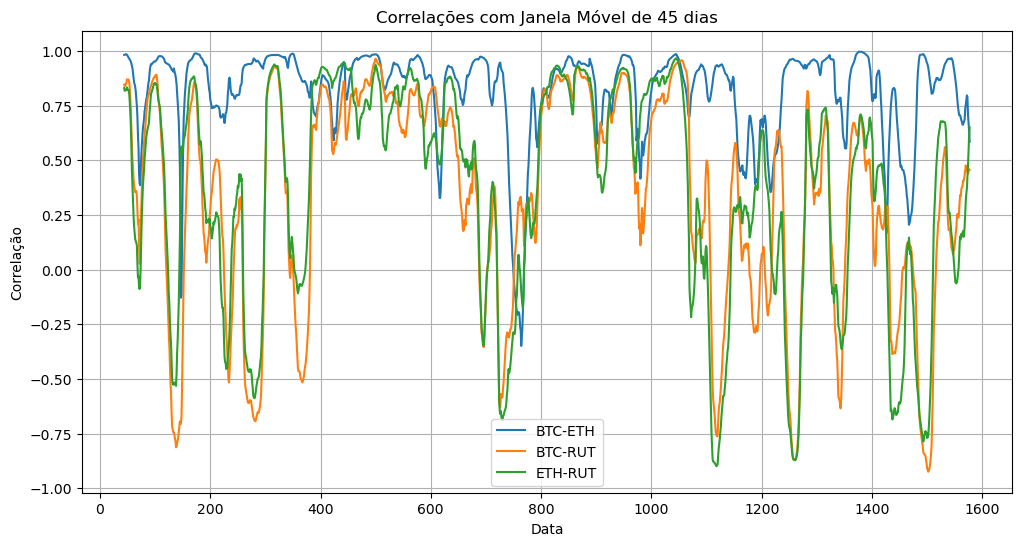

In [30]:
# 4.11. Correlação com uma janela móvel de 45 dias

# Calcular a correlação com uma janela móvel de 45 dias para os três ativos
rolling_correlation_btc_eth = df_combined['BTC'].rolling(window=45).corr(df_combined['ETH'])
rolling_correlation_btc_rut = df_combined['BTC'].rolling(window=45).corr(df_combined['RUT'])
rolling_correlation_eth_rut = df_combined['ETH'].rolling(window=45).corr(df_combined['RUT'])

# Plotar as correlações com uma janela móvel
plt.figure(figsize=(12, 6))
rolling_correlation_btc_eth.plot(label='BTC-ETH')
rolling_correlation_btc_rut.plot(label='BTC-RUT')
rolling_correlation_eth_rut.plot(label='ETH-RUT')
plt.title('Correlações com Janela Móvel de 45 dias')
plt.xlabel('Data')
plt.ylabel('Correlação')
plt.legend()
plt.grid(True)
plt.show()

### 5. Calcule quantas vezes houve Gap (espaço), que é o espaço entre o fechamento do dia anterior e a abertura do dia posterior. Determine de quanto foi esses gaps (o módulo) e a média deles por ano.

In [31]:
# Calcule quantas vezes houve Gap (espaço), que é o espaço entre o fechamento do dia anterior e a abertura do dia posterior.

# Definindo uma função para calcular o gap
def calcular_gap(df):
    df['Gap'] = df['Abertura'] - df['Último'].shift(1)
    return df

# Calculando o gap para cada dataset
df_BTC_limpo = calcular_gap(df_BTC_limpo)
df_ETH_limpo = calcular_gap(df_ETH_limpo)
df_RUT_limpo = calcular_gap(df_RUT_limpo)

# Contando quantas vezes houve gap para cada ativo
num_gaps_BTC = df_BTC_limpo[df_BTC_limpo['Gap'] != 0].shape[0]
num_gaps_ETH = df_ETH_limpo[df_ETH_limpo['Gap'] != 0].shape[0]
num_gaps_RUT = df_RUT_limpo[df_RUT_limpo['Gap'] != 0].shape[0]

print("Número de Gaps - BTC:", num_gaps_BTC)
print("Número de Gaps - ETH:", num_gaps_ETH)
print("Número de Gaps - RUT:", num_gaps_RUT)

Número de Gaps - BTC: 1578
Número de Gaps - ETH: 1578
Número de Gaps - RUT: 1578


In [32]:
# Determine de quanto foi esses gaps (o módulo)

# Calculando o módulo dos gaps para cada dataset
df_BTC_limpo['Gap_abs'] = df_BTC_limpo['Gap'].abs()
df_ETH_limpo['Gap_abs'] = df_ETH_limpo['Gap'].abs()
df_RUT_limpo['Gap_abs'] = df_RUT_limpo['Gap'].abs()

# Imprimindo o módulo dos gaps para cada ativo
print("Módulo dos Gaps - BTC:")
print(df_BTC_limpo['Gap_abs'].mean())
print("Módulo dos Gaps - ETH:")
print(df_ETH_limpo['Gap_abs'].mean())
print("Módulo dos Gaps - RUT:")
print(df_RUT_limpo['Gap_abs'].mean())

Módulo dos Gaps - BTC:
945.4088142041851
Módulo dos Gaps - ETH:
66.27562460367787
Módulo dos Gaps - RUT:
26.290513633481293


In [33]:
# Determine de quanto foi esses gaps (o módulo) e a média deles por ano

# Calculando a média dos gaps absolutos por dia para cada ativo
mean_gaps_BTC = df_BTC_limpo.groupby('Data')['Gap_abs'].mean()
mean_gaps_ETH = df_ETH_limpo.groupby('Data')['Gap_abs'].mean()
mean_gaps_RUT = df_RUT_limpo.groupby('Data')['Gap_abs'].mean()

# Calculando a média global dos gaps absolutos por ano
mean_global_gaps_BTC = mean_gaps_BTC.groupby(mean_gaps_BTC.index.year).mean()
mean_global_gaps_ETH = mean_gaps_ETH.groupby(mean_gaps_ETH.index.year).mean()
mean_global_gaps_RUT = mean_gaps_RUT.groupby(mean_gaps_RUT.index.year).mean()

# Imprimindo a média global dos gaps absolutos por ano
print("Média Global de Gaps Absolutos por Ano - BTC:")
print(mean_global_gaps_BTC)
print("\nMédia Global de Gaps Absolutos por Ano - ETH:")
print(mean_global_gaps_ETH)
print("\nMédia Global de Gaps Absolutos por Ano - RUT:")
print(mean_global_gaps_RUT)

Média Global de Gaps Absolutos por Ano - BTC:
Data
2018     385.848207
2019     315.924603
2020     441.861390
2021    2348.596899
2022    1148.149802
2023     775.374400
2024    2032.281481
Name: Gap_abs, dtype: float64

Média Global de Gaps Absolutos por Ano - ETH:
Data
2018     33.421195
2019      8.370913
2020     17.293398
2021    165.943256
2022    108.979289
2023     50.376320
2024    121.486667
Name: Gap_abs, dtype: float64

Média Global de Gaps Absolutos por Ano - RUT:
Data
2018    18.331514
2019    15.954048
2020    29.741776
2021    32.911899
2022    37.087747
2023    23.714120
2024    24.673889
Name: Gap_abs, dtype: float64


In [34]:
# 6. Calcule quantas vezes houve fechamento de Gap, ou seja, se houver gap, o fechamento do dia posterior tem que acontecer acima ou abaixo do dia anterior.

# Calculando se houve fechamento de gap para cada ativo
df_BTC_limpo['Fechamento_de_Gap'] = (df_BTC_limpo['Abertura'] < df_BTC_limpo['Último'].shift(-1)).astype(int)
df_ETH_limpo['Fechamento_de_Gap'] = (df_ETH_limpo['Abertura'] < df_ETH_limpo['Último'].shift(-1)).astype(int)
df_RUT_limpo['Fechamento_de_Gap'] = (df_RUT_limpo['Abertura'] < df_RUT_limpo['Último'].shift(-1)).astype(int)

# Contando quantas vezes houve fechamento de gap para cada ativo
count_gap_closures_BTC = df_BTC_limpo['Fechamento_de_Gap'].sum()
count_gap_closures_ETH = df_ETH_limpo['Fechamento_de_Gap'].sum()
count_gap_closures_RUT = df_RUT_limpo['Fechamento_de_Gap'].sum()

# Imprimindo o resultado
print("Quantidade de Fechamentos de Gap - BTC:", count_gap_closures_BTC)
print("Quantidade de Fechamentos de Gap - ETH:", count_gap_closures_ETH)
print("Quantidade de Fechamentos de Gap - RUT:", count_gap_closures_RUT)

Quantidade de Fechamentos de Gap - BTC: 622
Quantidade de Fechamentos de Gap - ETH: 568
Quantidade de Fechamentos de Gap - RUT: 704


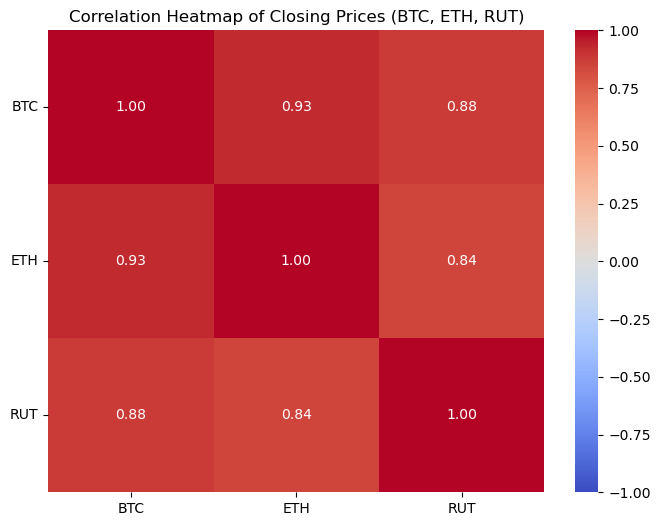

In [35]:
# 7. Apresente gráficos com subplots das correlações entre os ativos.

# Criando um DataFrame com os fechamentos de BTC, ETH e RUT
df_close = pd.concat([df_BTC_limpo['Último'], df_ETH_limpo['Último'], df_RUT_limpo['Último']], axis=1)
df_close.columns = ['BTC', 'ETH', 'RUT']  # Renomeando as colunas

# Calculando a matriz de correlação entre os ativos
correlation_matrix = df_close.corr()

# Plotando o mapa de calor da matriz de correlação
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1, fmt=".2f")
plt.title('Correlation Heatmap of Closing Prices (BTC, ETH, RUT)')
plt.xticks(ticks=[0.5, 1.5, 2.5], labels=['BTC', 'ETH', 'RUT'])
plt.yticks(ticks=[0.5, 1.5, 2.5], labels=['BTC', 'ETH', 'RUT'], rotation=0)
plt.show()

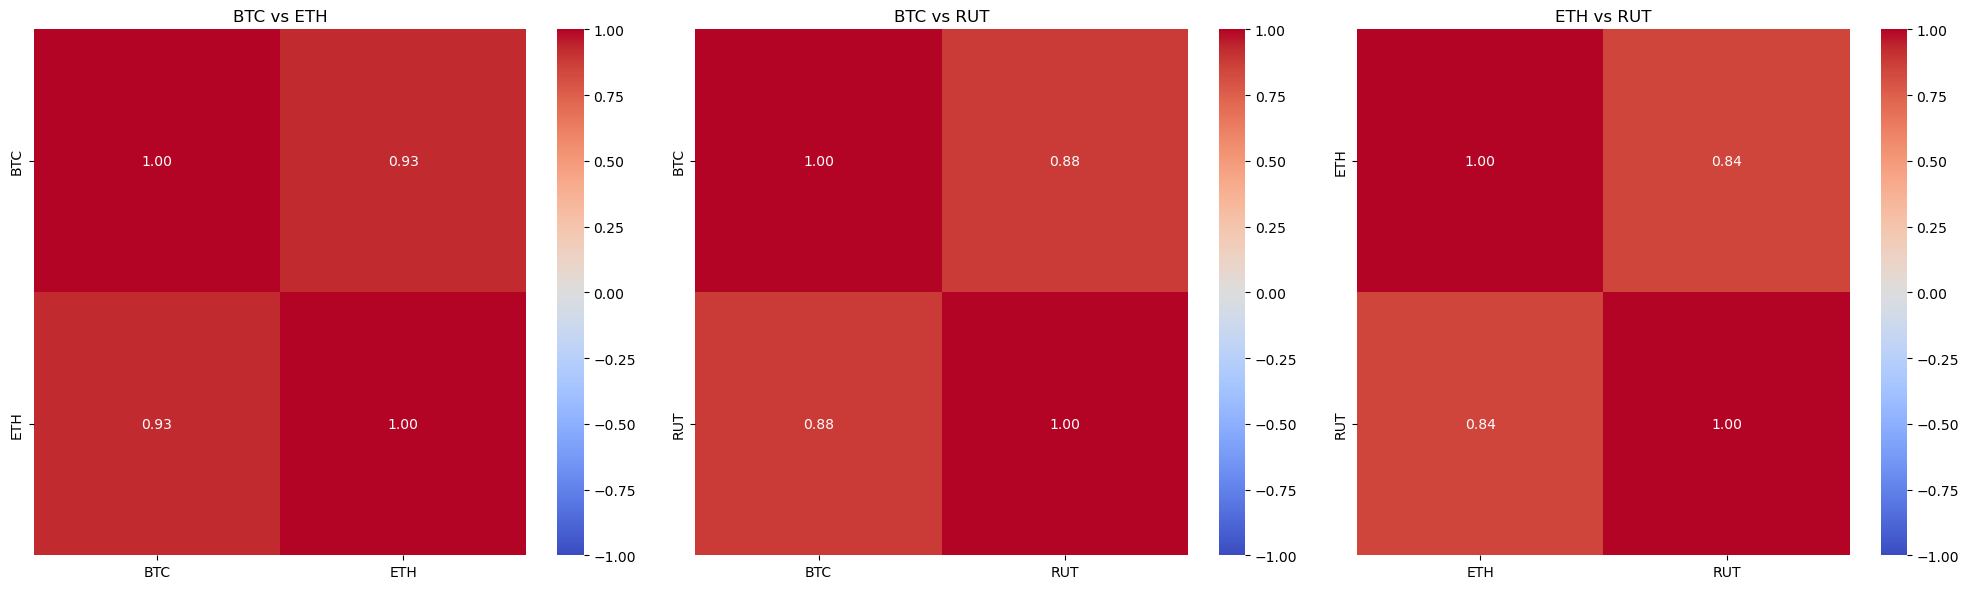

In [36]:
# Apresente gráficos com subplots das correlações entre os ativos.

# Criando um DataFrame com os preços de fechamento de BTC, ETH e RUT
df_close = pd.concat([df_BTC_limpo['Último'], df_ETH_limpo['Último'], df_RUT_limpo['Último']], axis=1)

# Renomeando as colunas do DataFrame df_close
df_close.columns = ['BTC', 'ETH', 'RUT']

# Calculando as correlações entre os ativos
correlation_BTC_ETH = df_close['BTC'].corr(df_close['ETH'])
correlation_BTC_RUT = df_close['BTC'].corr(df_close['RUT'])
correlation_ETH_RUT = df_close['ETH'].corr(df_close['RUT'])

# Plotando os subplots das correlações entre os ativos
fig, axs = plt.subplots(1, 3, figsize=(20, 6))

sns.heatmap(df_close[['BTC', 'ETH']].corr(), annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1, fmt=".2f", ax=axs[0])
axs[0].set_title('BTC vs ETH')

sns.heatmap(df_close[['BTC', 'RUT']].corr(), annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1, fmt=".2f", ax=axs[1])
axs[1].set_title('BTC vs RUT')

sns.heatmap(df_close[['ETH', 'RUT']].corr(), annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1, fmt=".2f", ax=axs[2])
axs[2].set_title('ETH vs RUT')

plt.tight_layout()
plt.show()

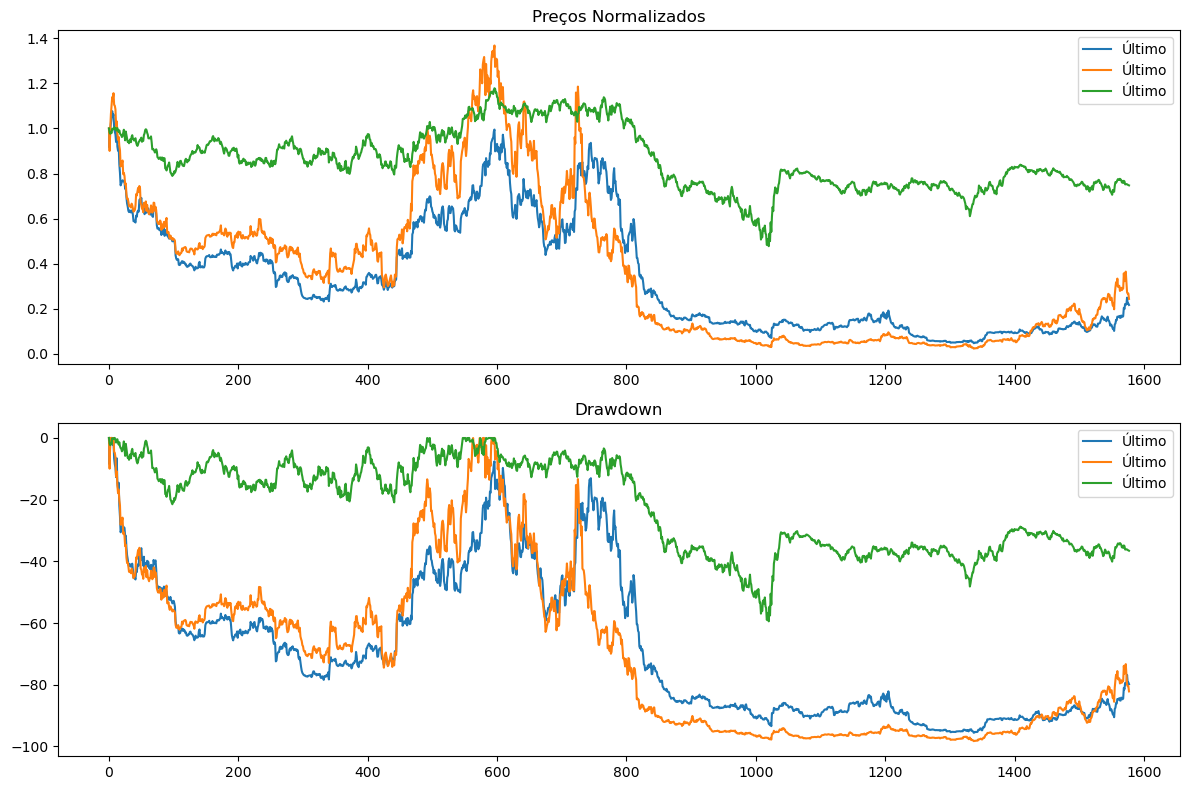

In [37]:
# 8. Apresente um gráfico normalizado comparando todos os ativos e usando toda a série. Faça também um gráfico do drawdown de toda a série para cada ativo. Coloque como subplots (acima os gráficos normalizados, abaixo os de drawdown).

# Criando um DataFrame com os preços de fechamento de BTC, ETH e RUT
df_close = pd.concat([df_BTC_limpo['Último'], df_ETH_limpo['Último'], df_RUT_limpo['Último']], axis=1)

# Normalizando os preços de fechamento de cada ativo
df_norm = df_close.div(df_close.iloc[0])

# Calculando o drawdown de cada ativo
drawdown = df_close.div(df_close.cummax()).sub(1).mul(100)

# Plotando os gráficos
fig, axs = plt.subplots(2, 1, figsize=(12, 8))

# Gráfico dos preços normalizados
df_norm.plot(ax=axs[0])
axs[0].set_title('Preços Normalizados')

# Gráfico do drawdown
drawdown.plot(ax=axs[1])
axs[1].set_title('Drawdown')

plt.tight_layout()
plt.show()

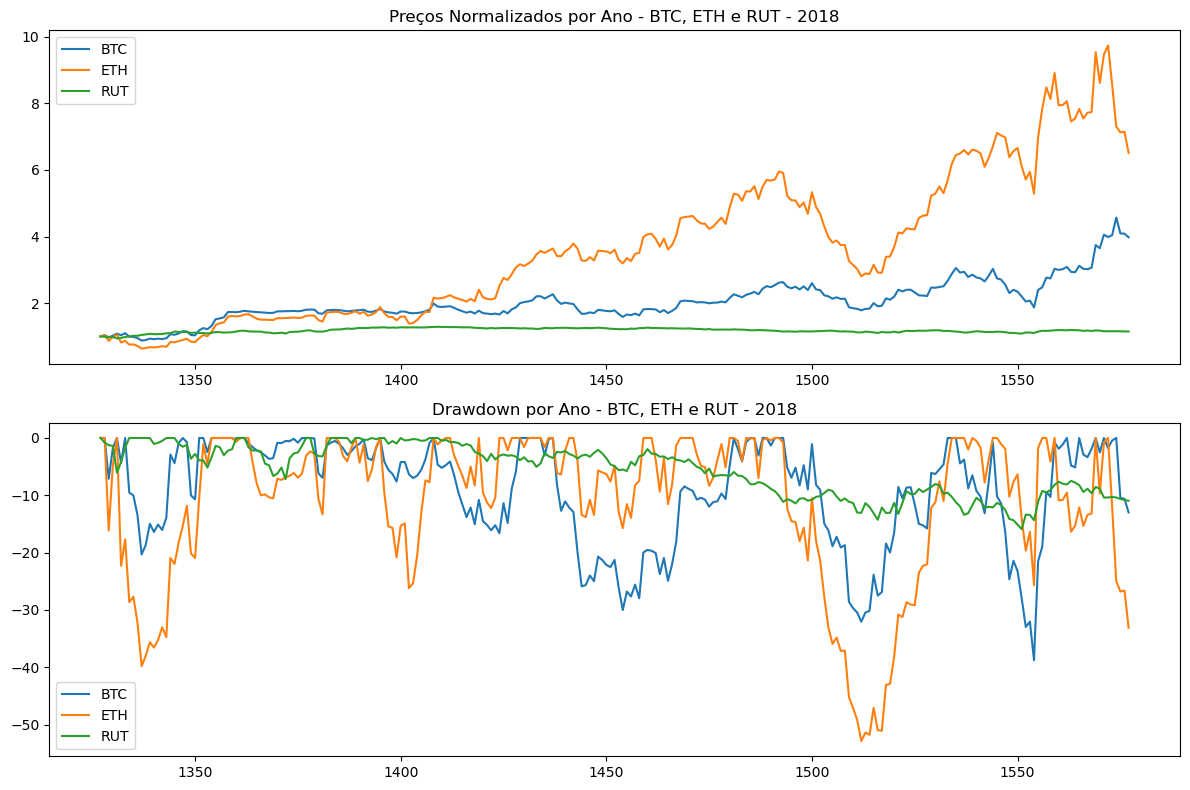

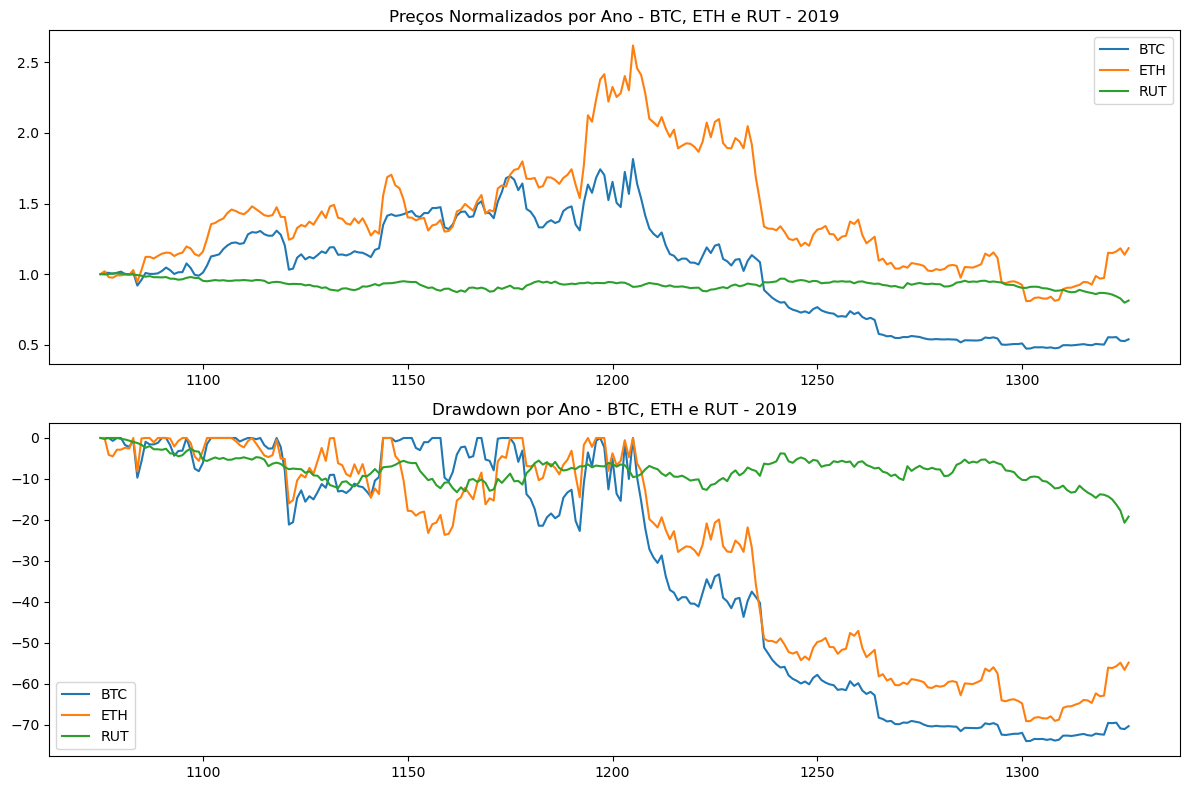

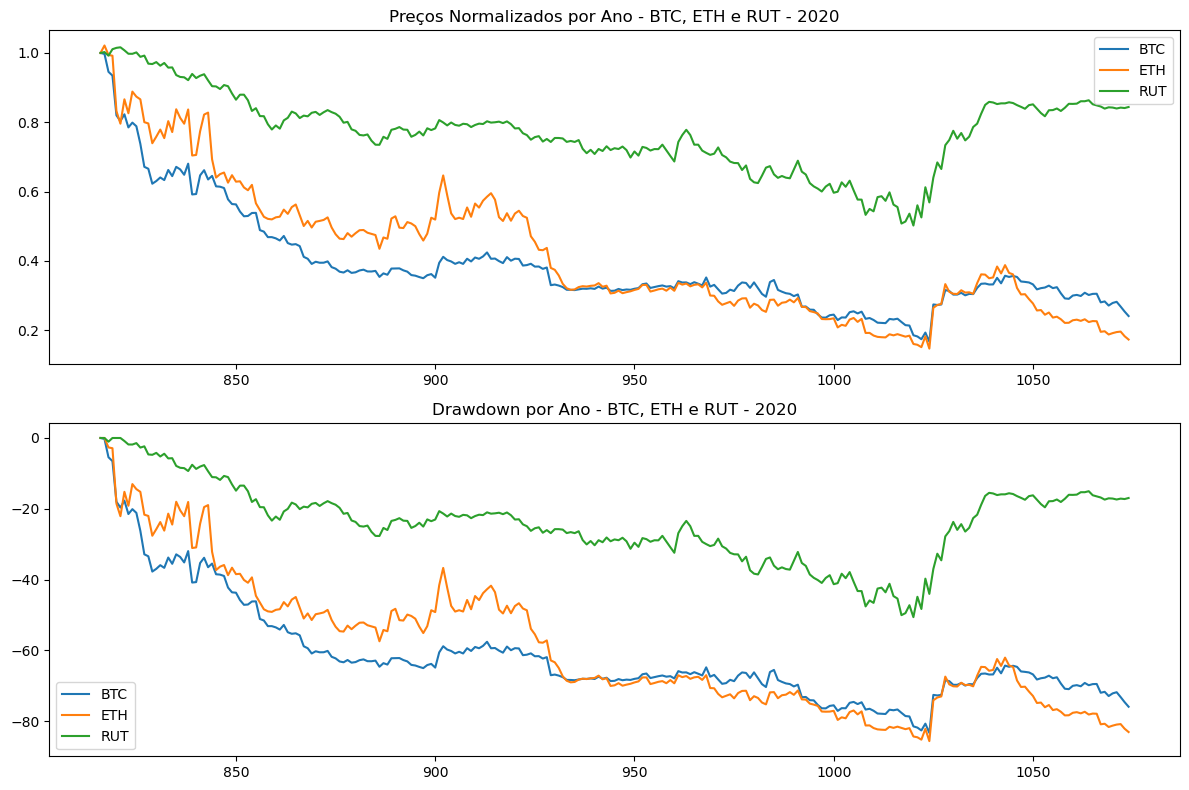

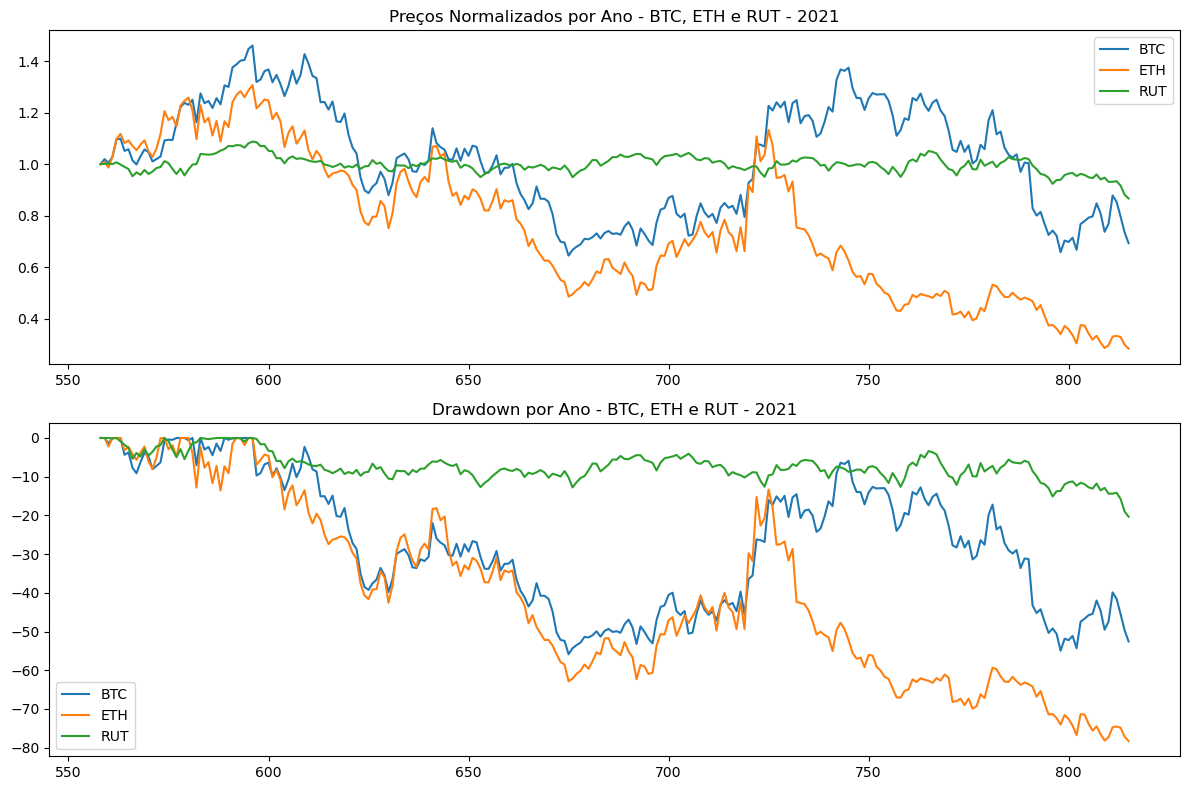

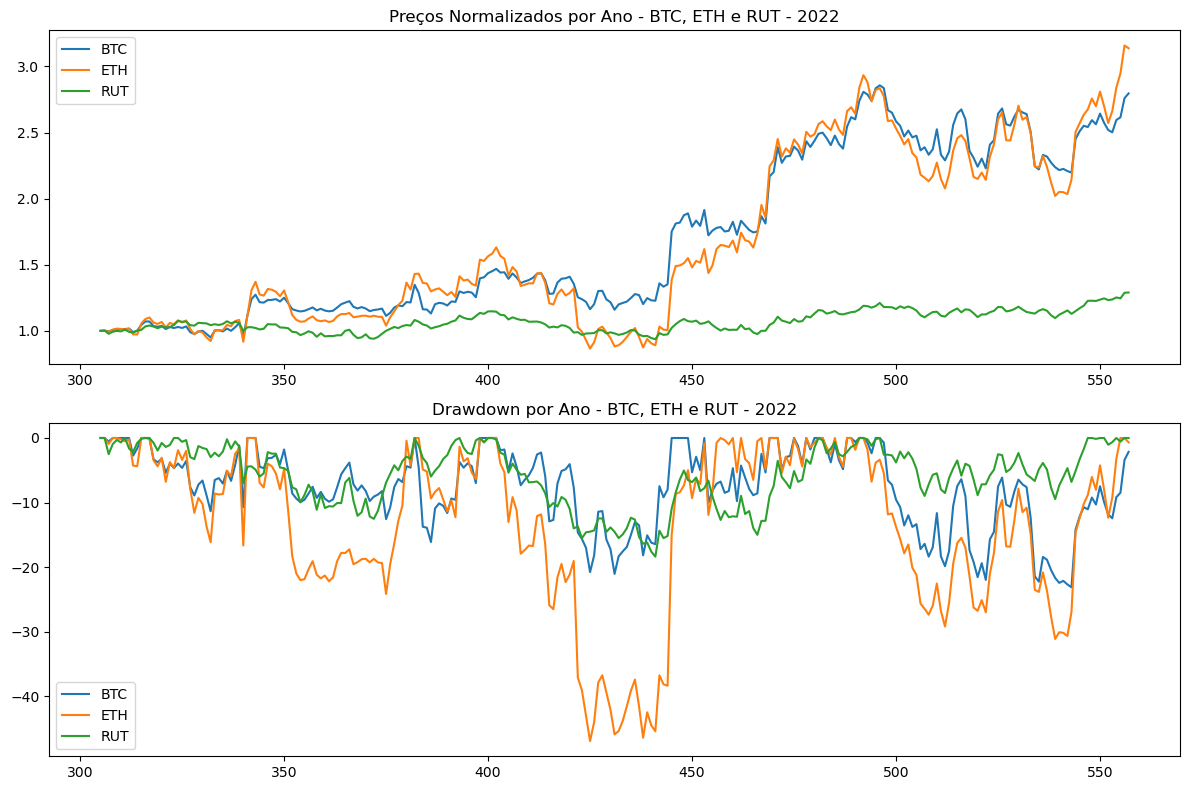

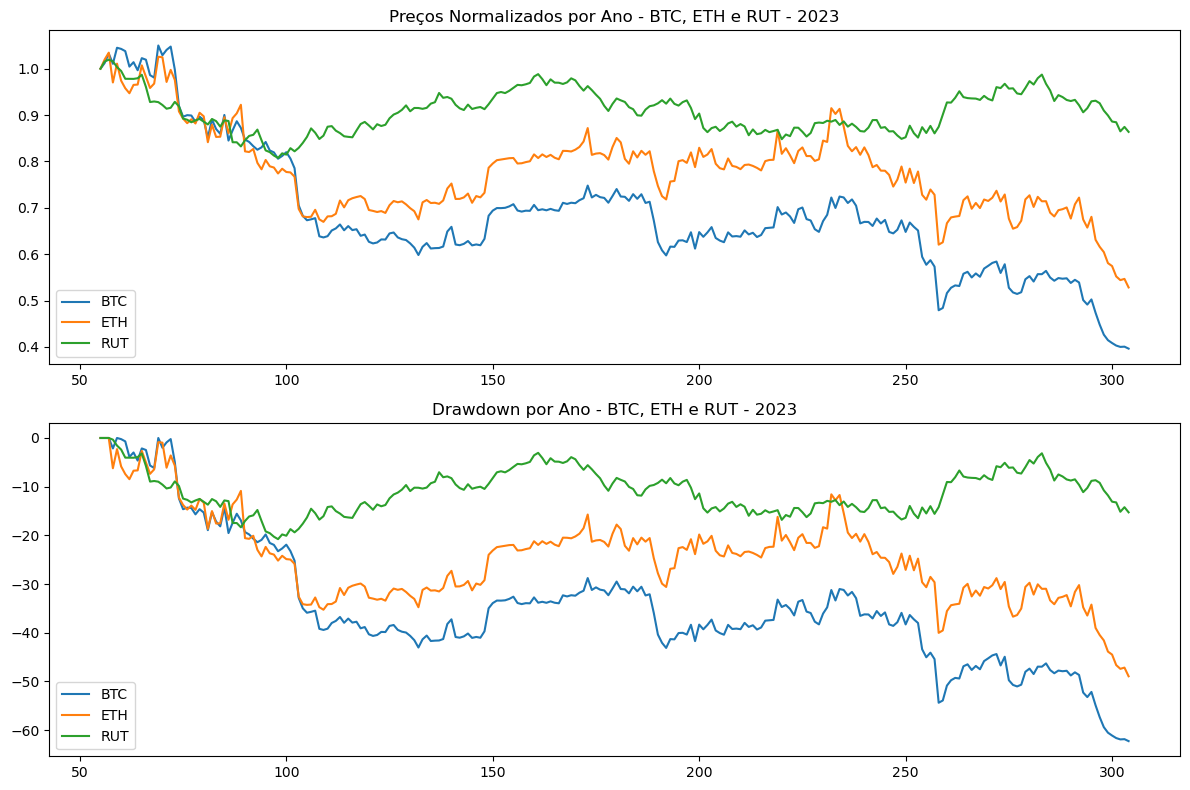

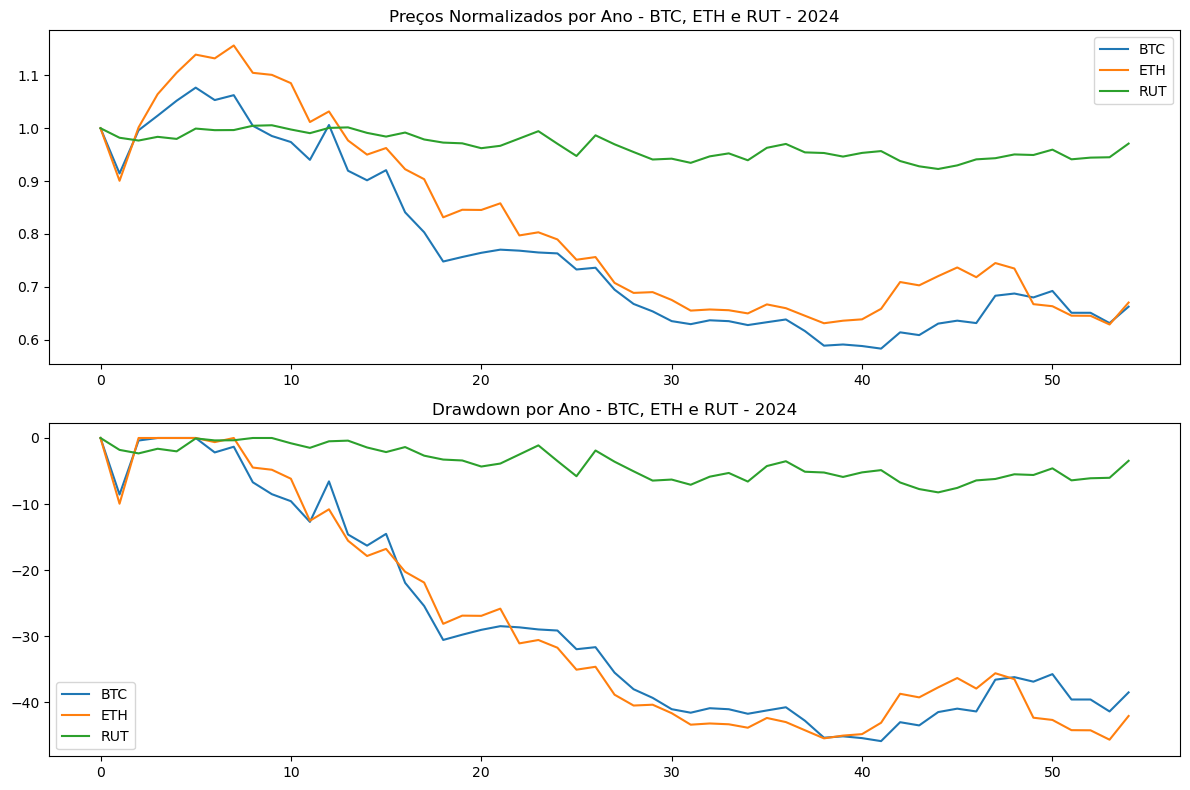

In [38]:
# 9. Apresente um gráfico normalizado comparando todos os ativos, porém separado por anos. Ou seja, o ponto zero da série será o primeiro ponto daquele ano. Apresente também como suplot o drawdown de cada ano para cada ativo para cada janela de ano.

# Função para normalizar os preços por ano
def normalizar_precos_por_ano(df, ano):
    df_ano = df[df['Ano'] == ano]
    return df_ano['Último'] / df_ano['Último'].iloc[0]

# Função para calcular o drawdown por ano
def calcular_drawdown_por_ano(df, ano):
    df_ano = df[df['Ano'] == ano]
    return (df_ano['Último'] / df_ano['Último'].cummax() - 1) * 100

# Função para plotar os gráficos por ano
def plotar_graficos_por_ano(df_BTC, df_ETH, df_RUT, ano):
    # Normalizar os preços de fechamento de cada ativo
    df_BTC_norm = normalizar_precos_por_ano(df_BTC, ano)
    df_ETH_norm = normalizar_precos_por_ano(df_ETH, ano)
    df_RUT_norm = normalizar_precos_por_ano(df_RUT, ano)

    # Calcular o drawdown de cada ativo
    drawdown_BTC = calcular_drawdown_por_ano(df_BTC, ano)
    drawdown_ETH = calcular_drawdown_por_ano(df_ETH, ano)
    drawdown_RUT = calcular_drawdown_por_ano(df_RUT, ano)

    # Plotar os gráficos
    fig, axs = plt.subplots(2, 1, figsize=(12, 8))

    # Gráfico dos preços normalizados por ano
    df_BTC_norm.plot(ax=axs[0])
    df_ETH_norm.plot(ax=axs[0])
    df_RUT_norm.plot(ax=axs[0])
    axs[0].set_title(f'Preços Normalizados por Ano - BTC, ETH e RUT - {ano}')
    axs[0].legend(['BTC', 'ETH', 'RUT'])

    # Gráfico do drawdown por ano
    drawdown_BTC.plot(ax=axs[1])
    drawdown_ETH.plot(ax=axs[1])
    drawdown_RUT.plot(ax=axs[1])
    axs[1].set_title(f'Drawdown por Ano - BTC, ETH e RUT - {ano}')
    axs[1].legend(['BTC', 'ETH', 'RUT'])

    plt.tight_layout()
    plt.show()

# Lista de anos
anos = range(2018, 2025)

# Plotar os gráficos para cada ano
for ano in anos:
    plotar_graficos_por_ano(df_BTC_limpo, df_ETH_limpo, df_RUT_limpo, ano)

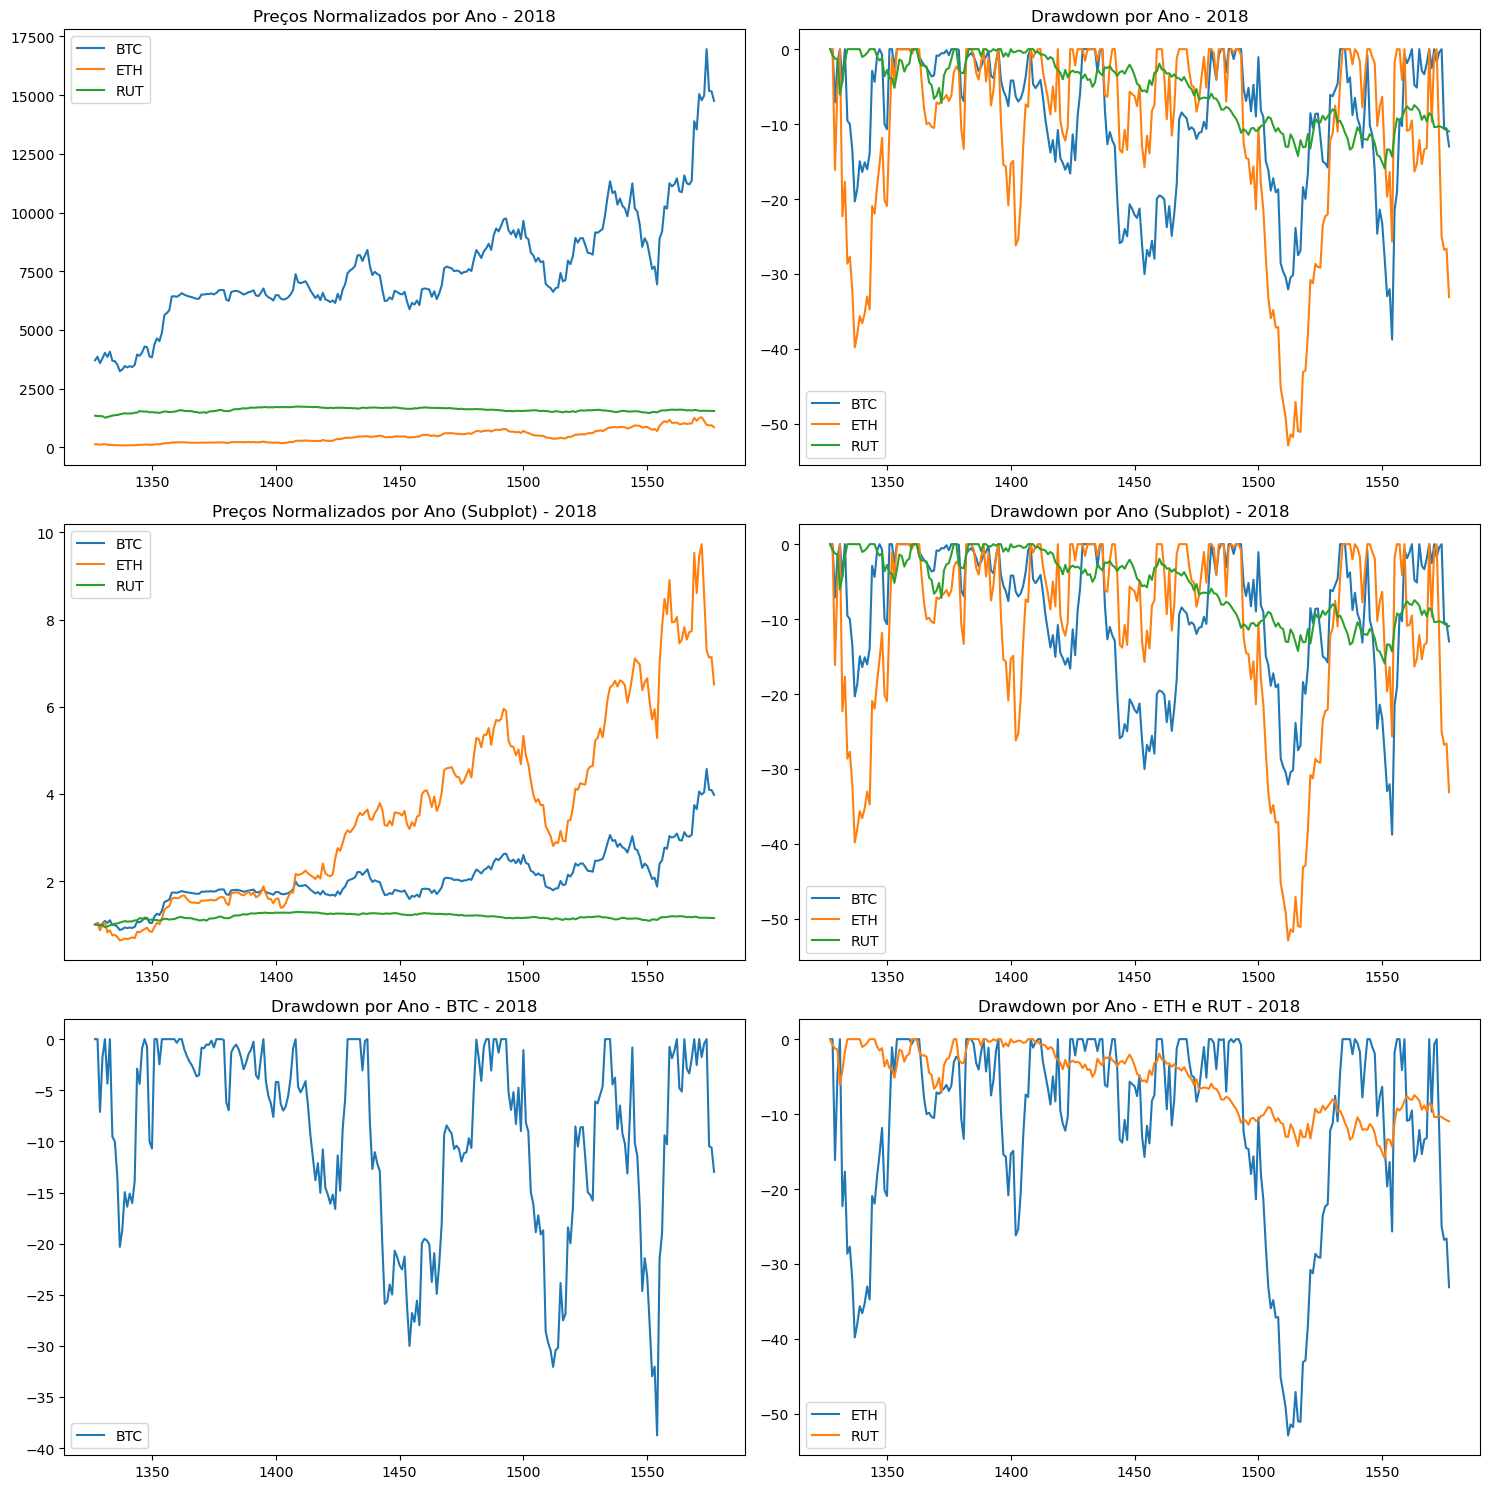

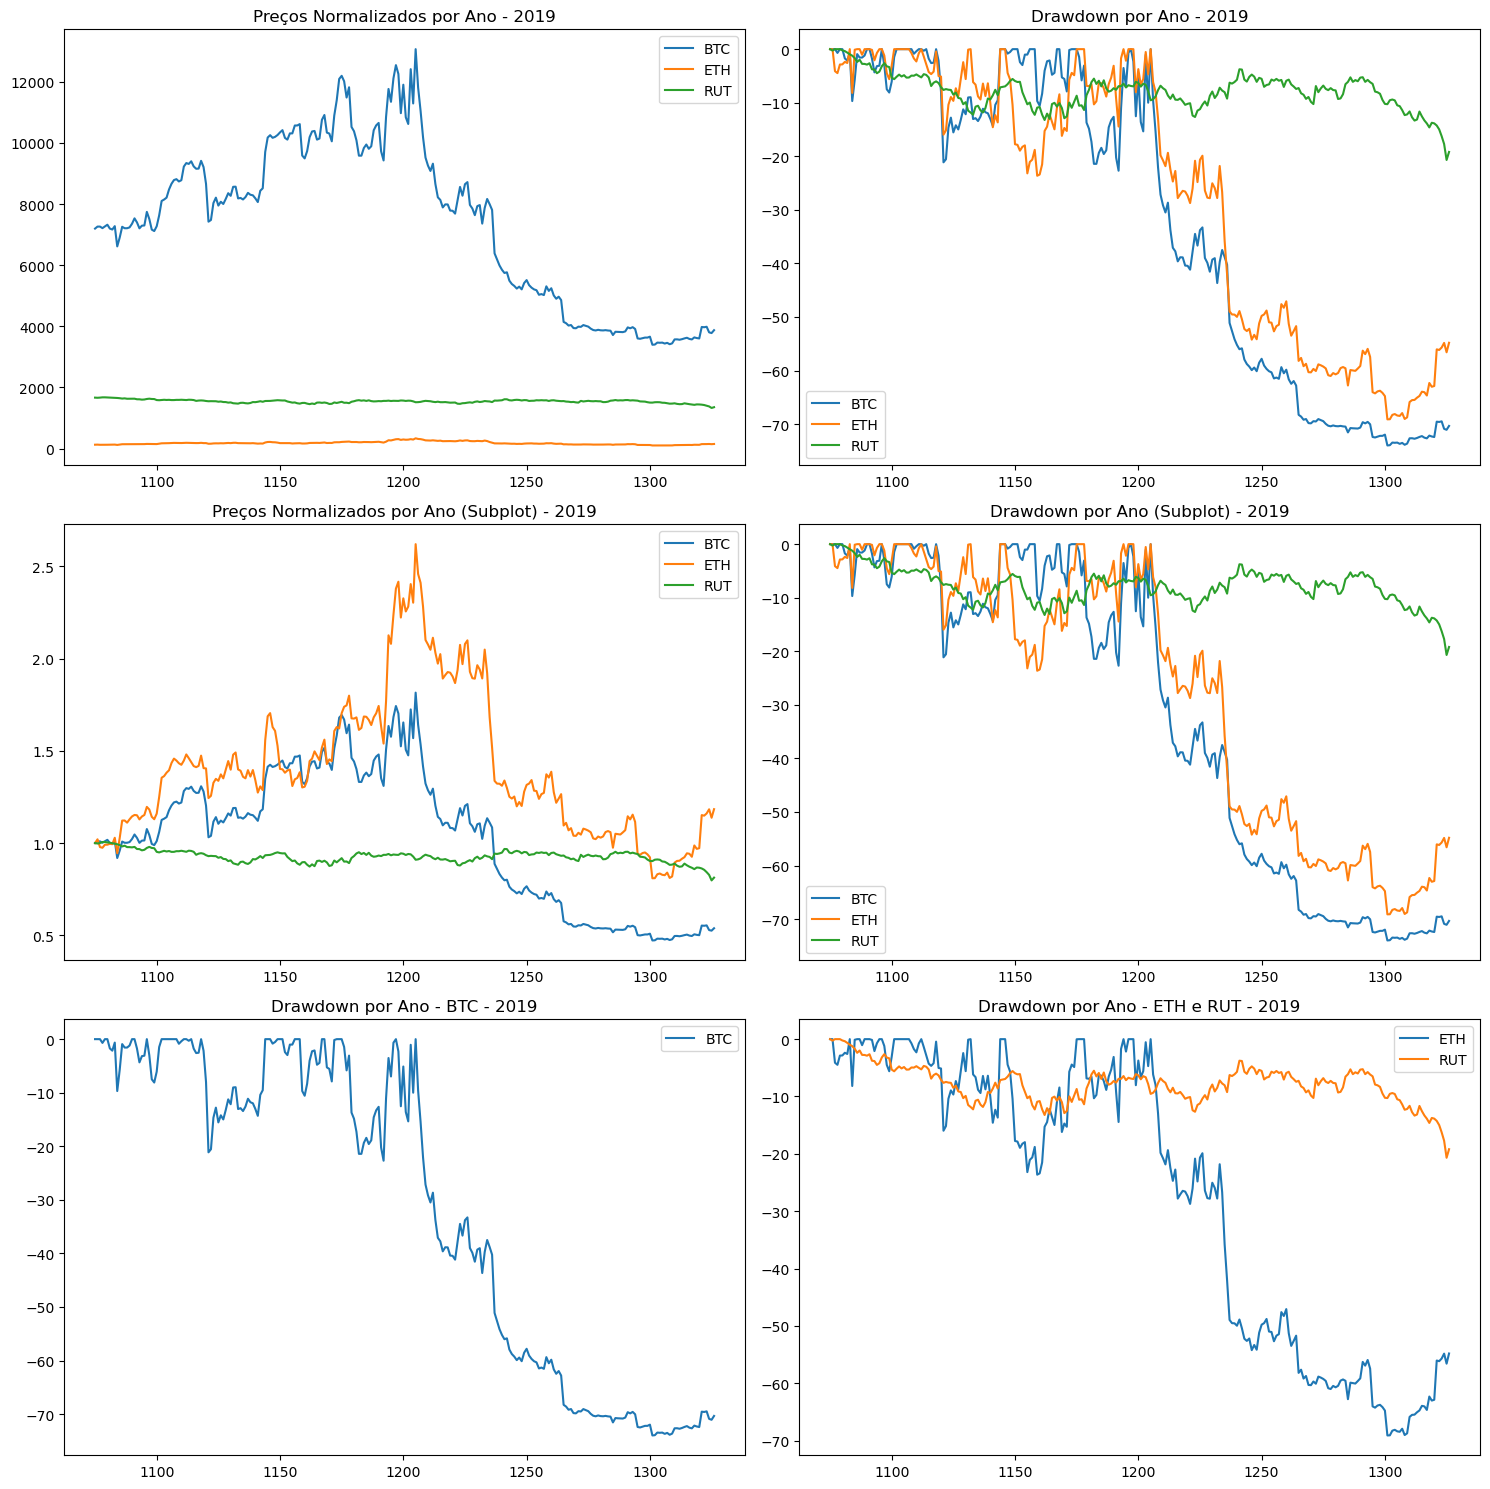

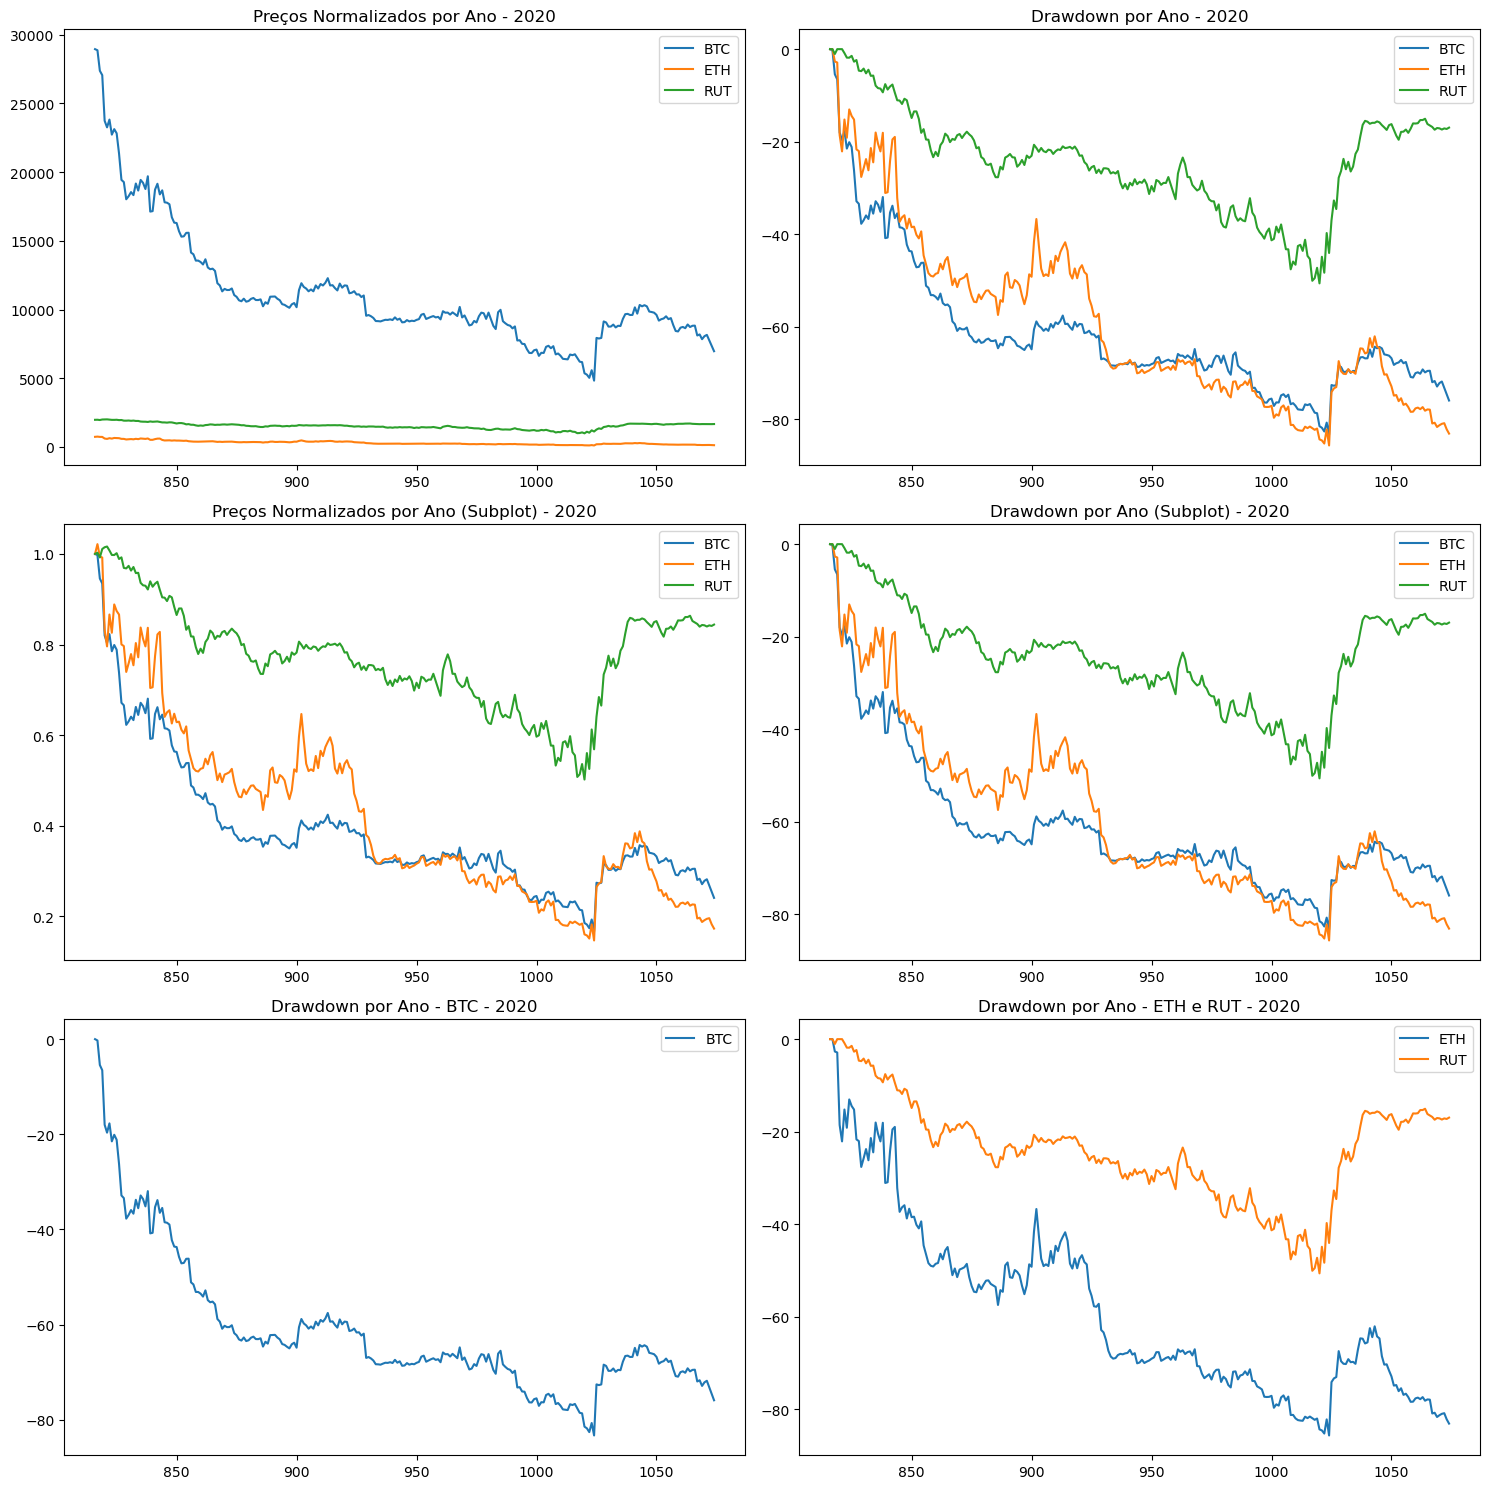

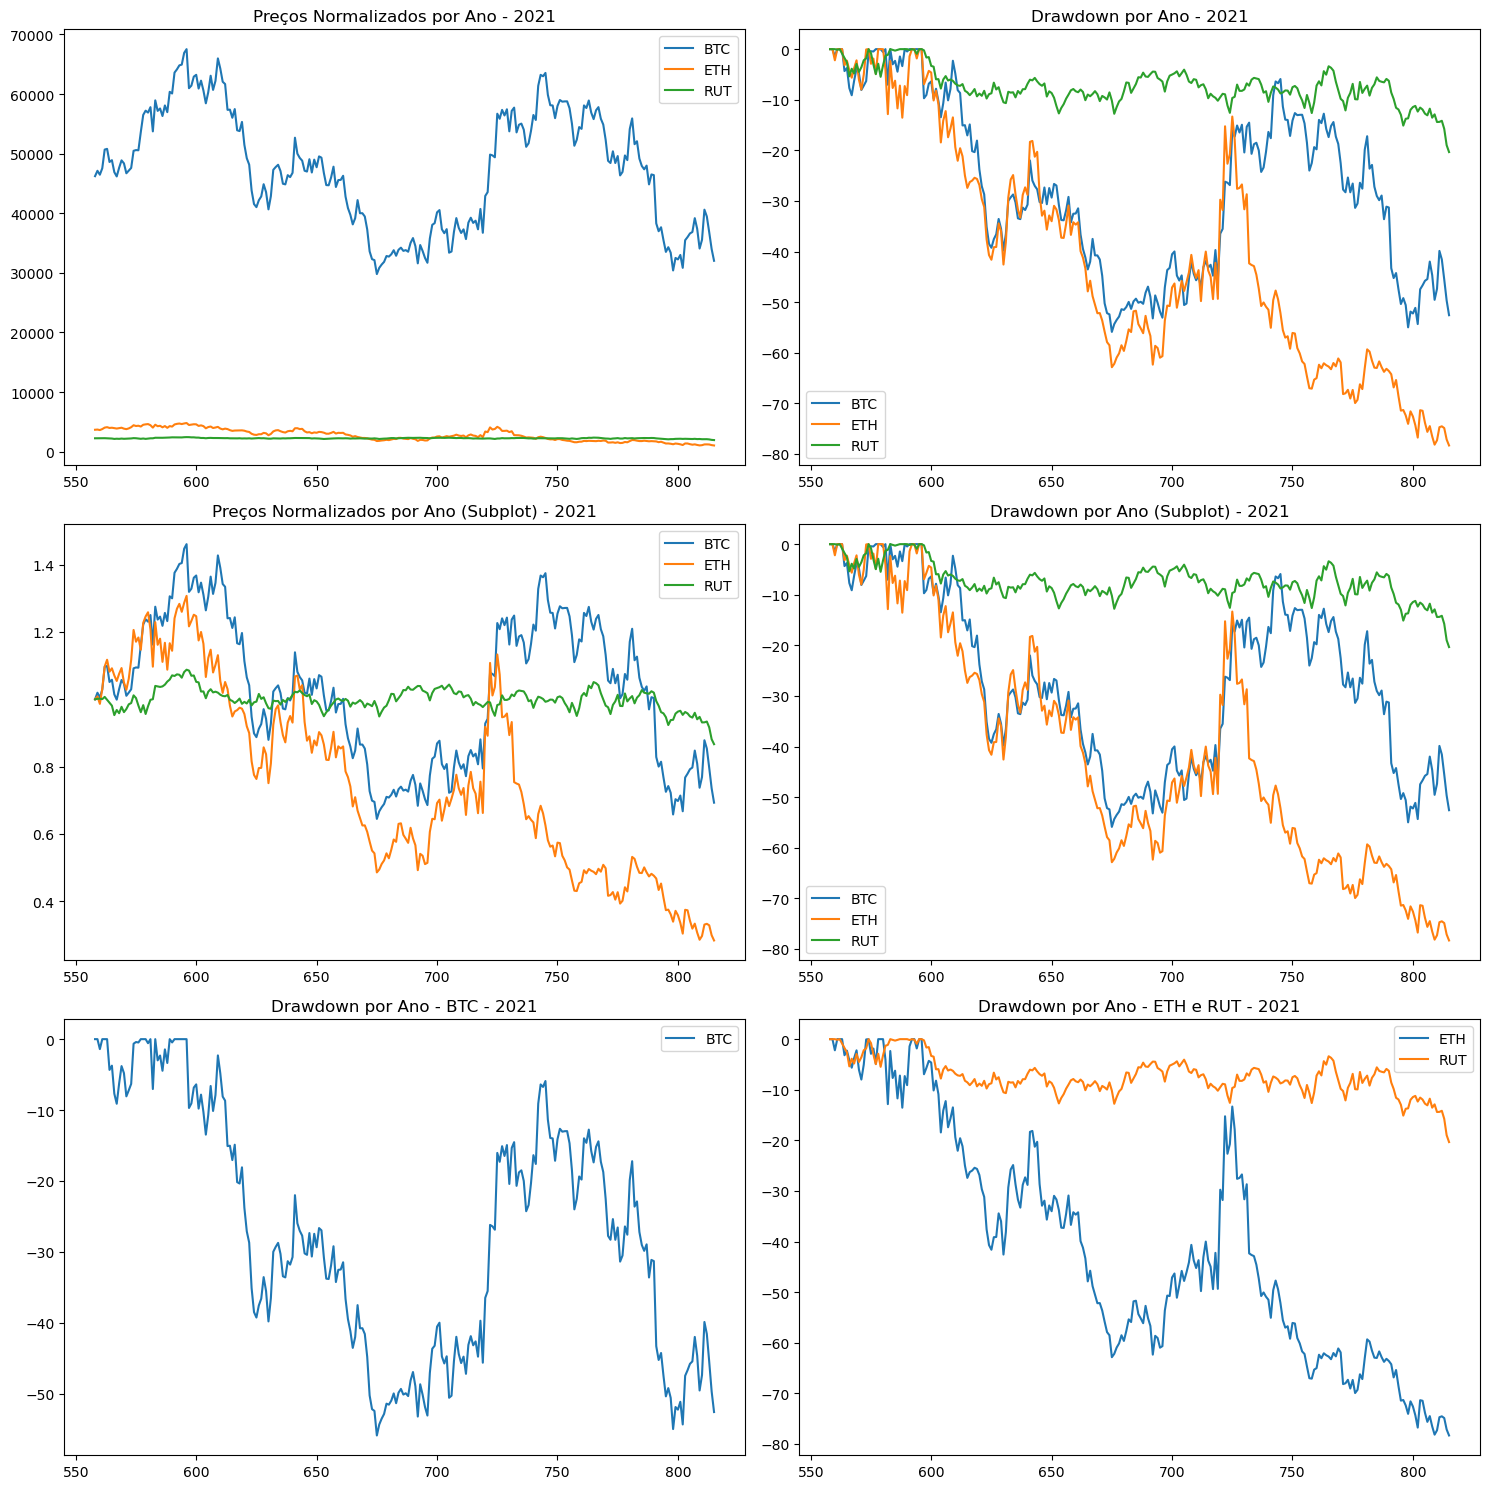

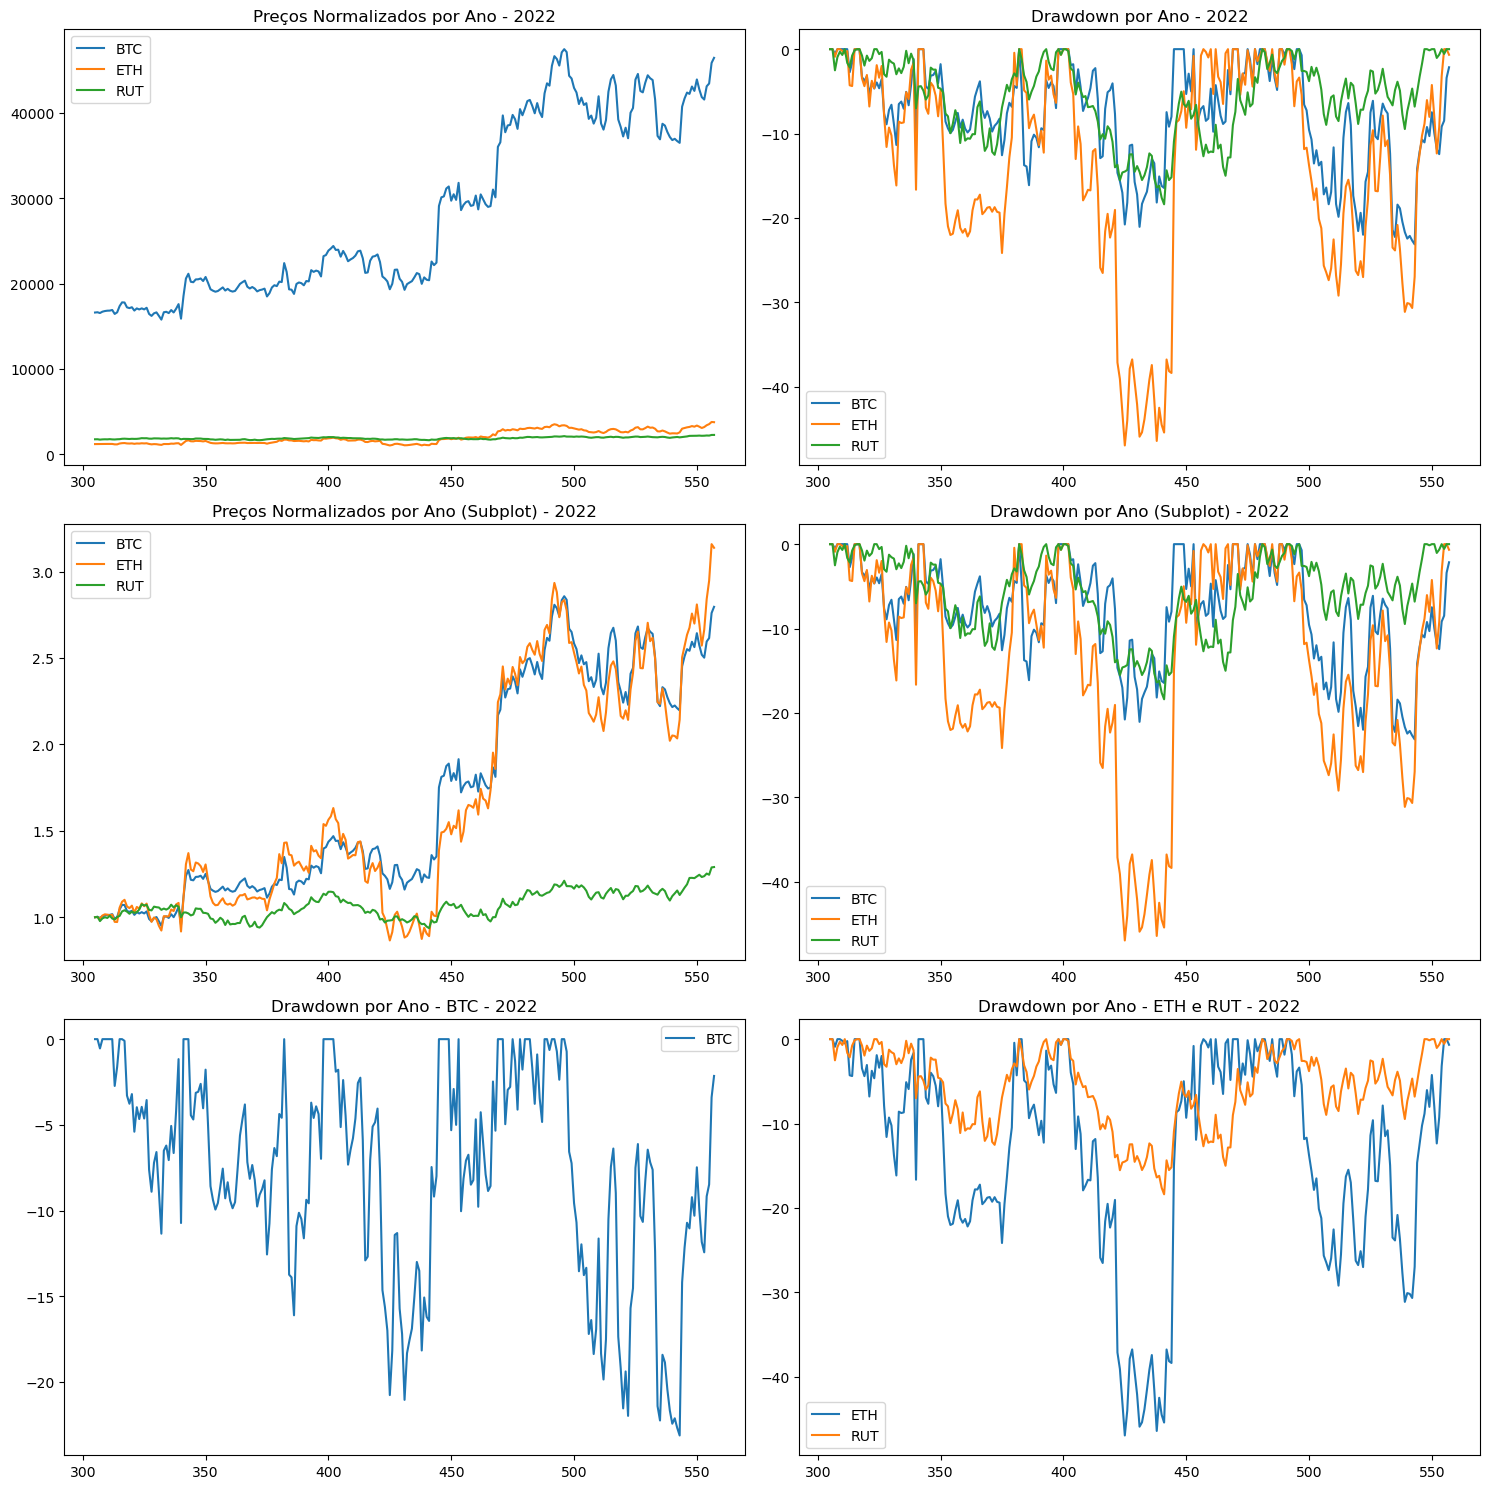

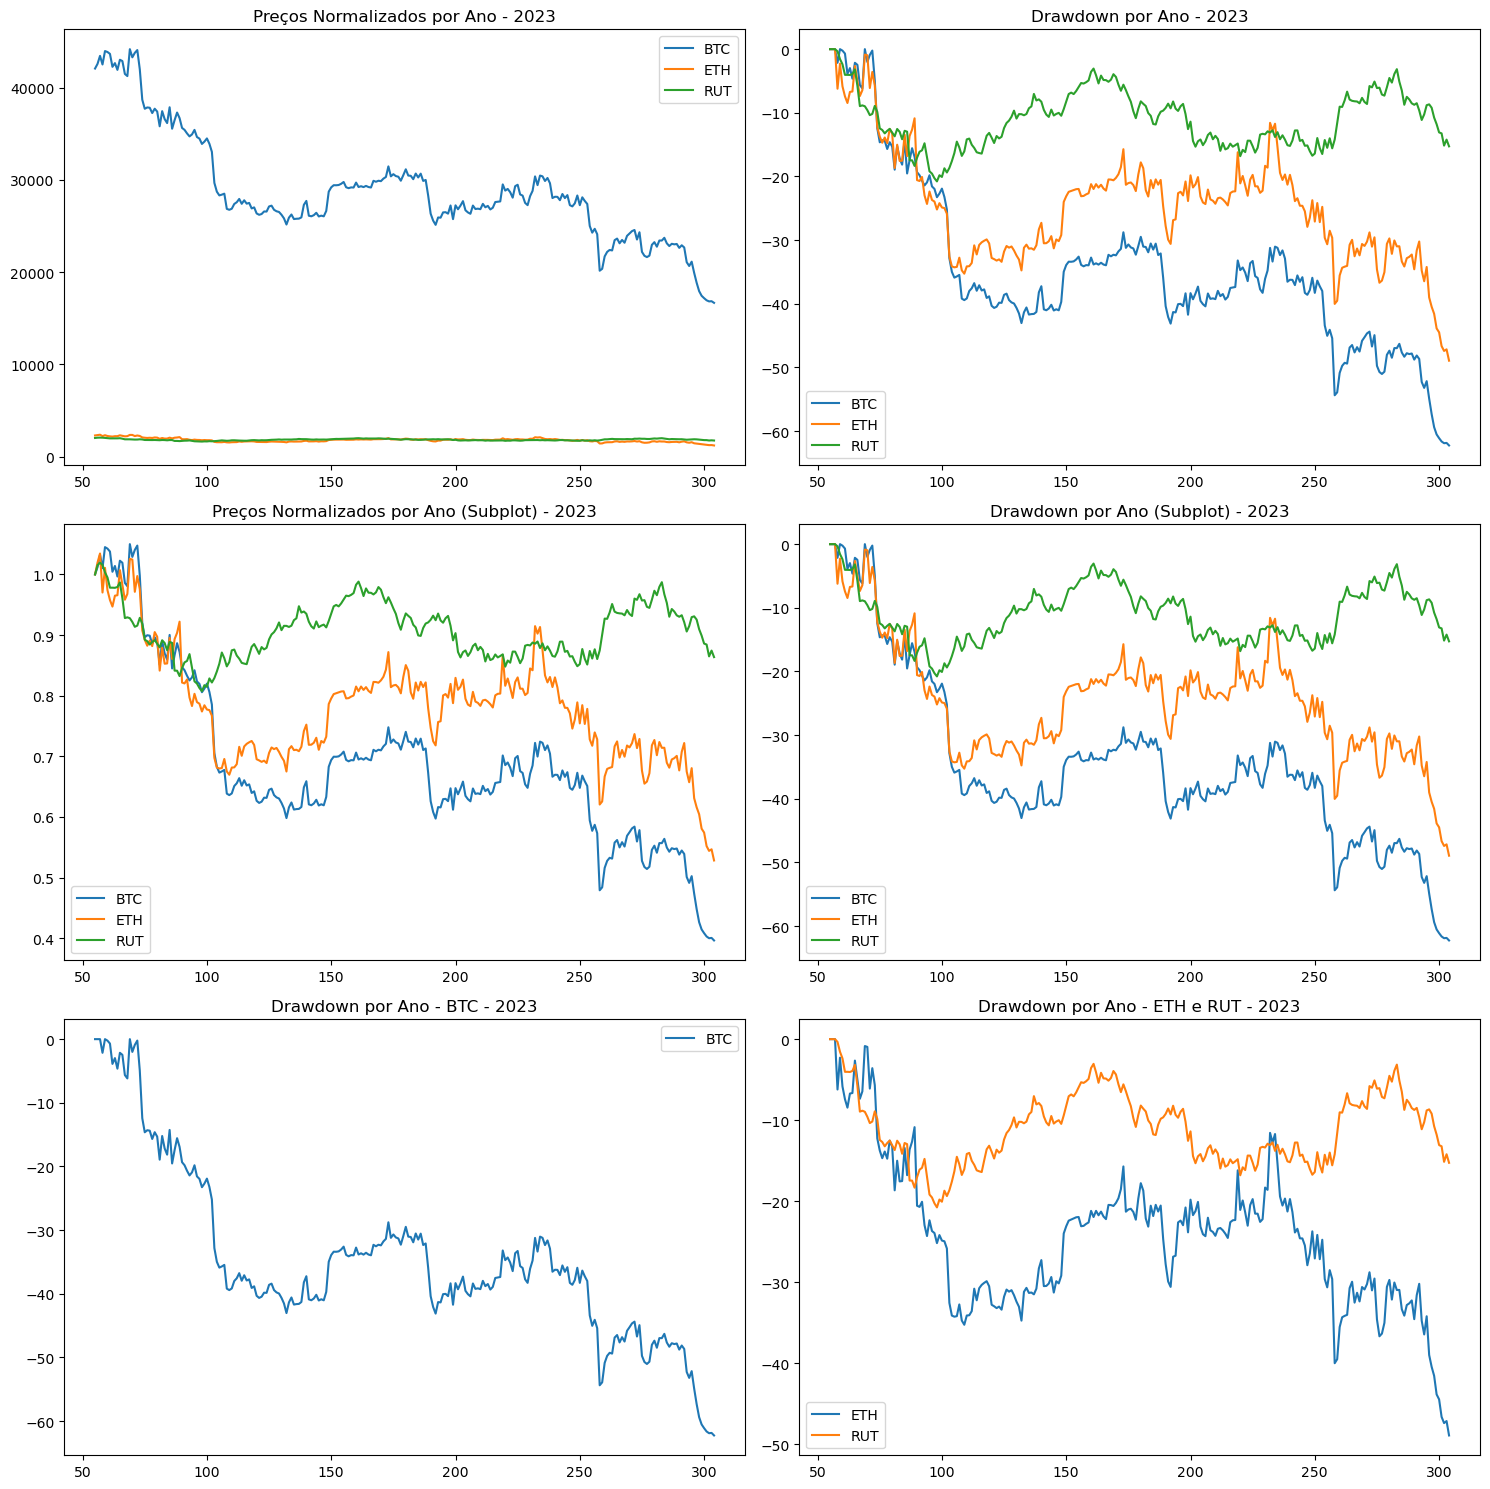

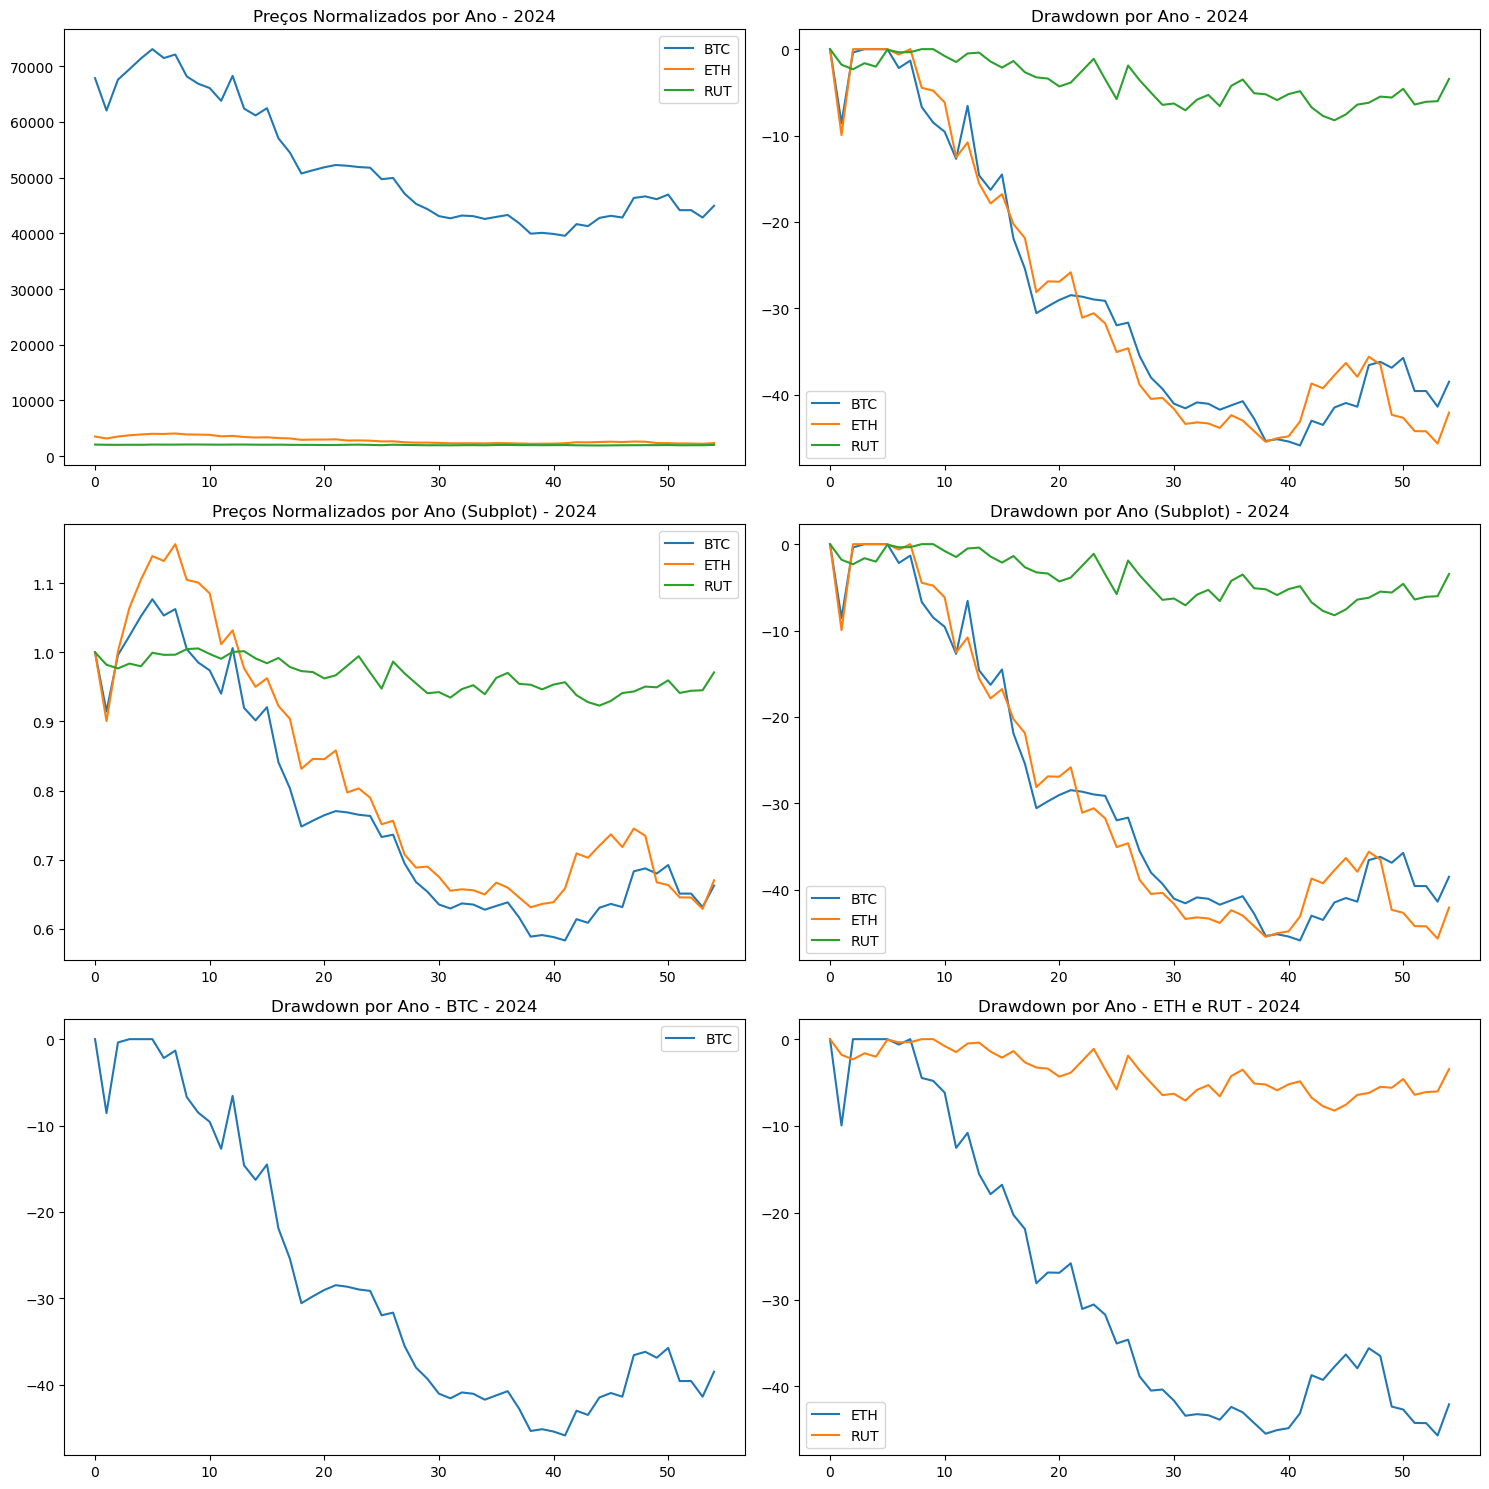

In [39]:
# Função para plotar os gráficos por ano
def plotar_graficos_por_ano(ano):
    # Selecionando os dados do ano específico
    df_BTC_ano = df_BTC_limpo[df_BTC_limpo['Ano'] == ano]
    df_ETH_ano = df_ETH_limpo[df_ETH_limpo['Ano'] == ano]
    df_RUT_ano = df_RUT_limpo[df_RUT_limpo['Ano'] == ano]
    
    # Normalizando os preços de fechamento de cada ativo
    df_BTC_norm = df_BTC_ano['Último'] / df_BTC_ano['Último'].iloc[0]
    df_ETH_norm = df_ETH_ano['Último'] / df_ETH_ano['Último'].iloc[0]
    df_RUT_norm = df_RUT_ano['Último'] / df_RUT_ano['Último'].iloc[0]

    # Calculando o drawdown de cada ativo
    drawdown_BTC = (df_BTC_ano['Último'] / df_BTC_ano['Último'].cummax() - 1) * 100
    drawdown_ETH = (df_ETH_ano['Último'] / df_ETH_ano['Último'].cummax() - 1) * 100
    drawdown_RUT = (df_RUT_ano['Último'] / df_RUT_ano['Último'].cummax() - 1) * 100

    # Plotando os gráficos
    fig, axs = plt.subplots(3, 2, figsize=(15, 15))

    # Gráfico dos preços normalizados por ano
    axs[0, 0].plot(df_BTC_ano['Último'], label='BTC')
    axs[0, 0].plot(df_ETH_ano['Último'], label='ETH')
    axs[0, 0].plot(df_RUT_ano['Último'], label='RUT')
    axs[0, 0].set_title(f'Preços Normalizados por Ano - {ano}')
    axs[0, 0].legend()

    # Gráfico do drawdown por ano
    axs[0, 1].plot(drawdown_BTC, label='BTC')
    axs[0, 1].plot(drawdown_ETH, label='ETH')
    axs[0, 1].plot(drawdown_RUT, label='RUT')
    axs[0, 1].set_title(f'Drawdown por Ano - {ano}')
    axs[0, 1].legend()

    # Gráfico dos preços normalizados por ano (subplot)
    for ativo in ['BTC', 'ETH', 'RUT']:
        df_norm = eval(f'df_{ativo}_ano')['Último'] / eval(f'df_{ativo}_ano')['Último'].iloc[0]
        axs[1, 0].plot(df_norm, label=ativo)
    axs[1, 0].set_title(f'Preços Normalizados por Ano (Subplot) - {ano}')
    axs[1, 0].legend()

    # Gráfico do drawdown por ano (subplot)
    axs[1, 1].plot(drawdown_BTC, label='BTC')
    axs[1, 1].plot(drawdown_ETH, label='ETH')
    axs[1, 1].plot(drawdown_RUT, label='RUT')
    axs[1, 1].set_title(f'Drawdown por Ano (Subplot) - {ano}')
    axs[1, 1].legend()

    # Gráfico do drawdown por ano para cada ativo
    axs[2, 0].plot(drawdown_BTC, label='BTC')
    axs[2, 0].set_title(f'Drawdown por Ano - BTC - {ano}')
    axs[2, 0].legend()

    axs[2, 1].plot(drawdown_ETH, label='ETH')
    axs[2, 1].plot(drawdown_RUT, label='RUT')
    axs[2, 1].set_title(f'Drawdown por Ano - ETH e RUT - {ano}')
    axs[2, 1].legend()

    plt.tight_layout()
    plt.show()

# Lista de anos
anos = range(2018, 2025)

# Plotando os gráficos para cada ano
for ano in anos:
    plotar_graficos_por_ano(ano)

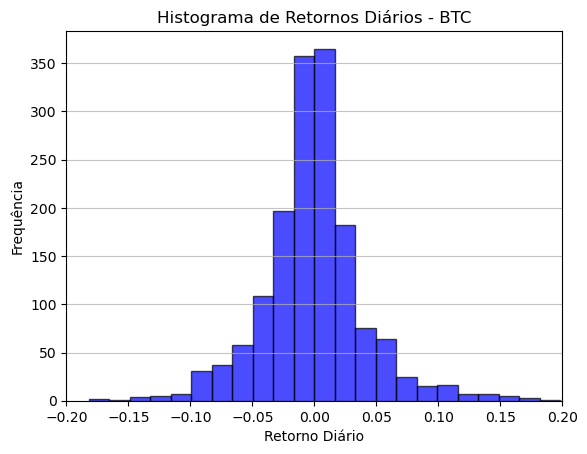

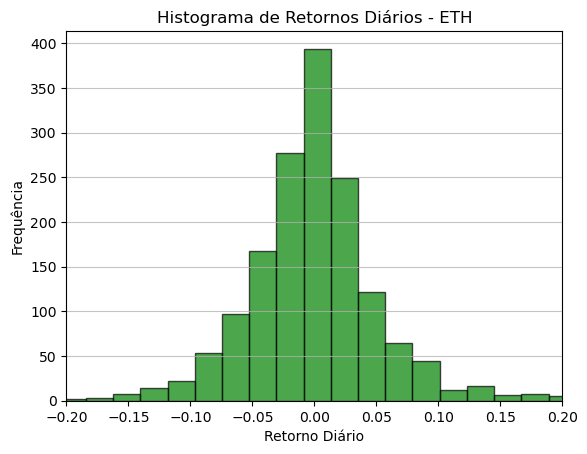

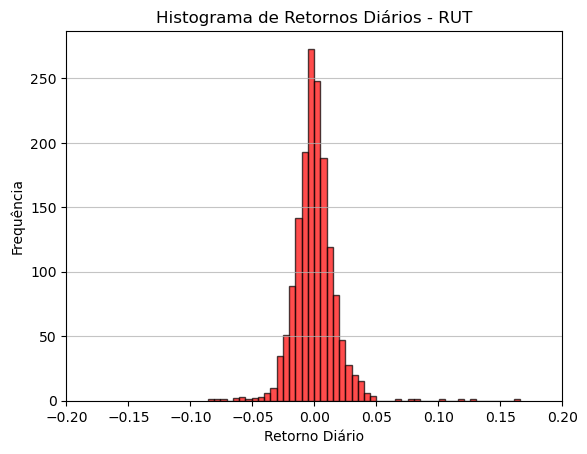

In [40]:
# 10. Apresente um gráfico com o histograma dos retornos de todos os ativos. Use um binning adequado.

def calcular_retornos_diarios(df):
    return df['Último'].pct_change().dropna()

def plotar_histograma_retornos(df_retornos, titulo, cor):
    plt.hist(df_retornos, bins=50, alpha=0.7, color=cor, edgecolor='black')
    plt.title(titulo)
    plt.xlabel('Retorno Diário')
    plt.ylabel('Frequência')
    plt.grid(axis='y', alpha=0.75)
    plt.xlim(-0.2, 0.2)
    plt.show()

# Calculando os retornos diários
df_BTC_retornos = calcular_retornos_diarios(df_BTC_limpo)
df_ETH_retornos = calcular_retornos_diarios(df_ETH_limpo)
df_RUT_retornos = calcular_retornos_diarios(df_RUT_limpo)

# Plotando os histogramas
plotar_histograma_retornos(df_BTC_retornos, 'Histograma de Retornos Diários - BTC', 'b')
plotar_histograma_retornos(df_ETH_retornos, 'Histograma de Retornos Diários - ETH', 'g')
plotar_histograma_retornos(df_RUT_retornos, 'Histograma de Retornos Diários - RUT', 'r')

In [41]:
# - Faça uma tabela comparativa entre os ativos designados para você, onde deverão constar além dos parâmetros estatísticos:
# i) drawdown máximo por ano;
# ii) retorno por ano;
# iii) desvio padrão por ano;
# iv) drawdown máximo da série histórica.

# Função para calcular o drawdown máximo
def calculate_max_drawdown(returns):
    wealth_index = (1 + returns).cumprod()
    previous_peaks = wealth_index.cummax()
    drawdowns = (wealth_index - previous_peaks) / previous_peaks
    return drawdowns.min()

# Dados de exemplo
np.random.seed(42)
years = np.random.choice(range(2018, 2023), 1000)
btc_returns = np.random.normal(loc=0.05, scale=0.1, size=1000)
eth_returns = np.random.normal(loc=0.03, scale=0.08, size=1000)
rut_returns = np.random.normal(loc=0.02, scale=0.05, size=1000)

# Criando DataFrame com os retornos
df = pd.DataFrame({'Ano': years, 'BTC': btc_returns, 'ETH': eth_returns, 'RUT': rut_returns})

# Agrupando por ano e calcular as métricas
metrics = df.groupby('Ano').agg({
    'BTC': ['mean', 'std', calculate_max_drawdown],
    'ETH': ['mean', 'std', calculate_max_drawdown],
    'RUT': ['mean', 'std', calculate_max_drawdown]
})

# Calculando drawdown máximo da série histórica
btc_series_drawdown = calculate_max_drawdown(df['BTC'])
eth_series_drawdown = calculate_max_drawdown(df['ETH'])
rut_series_drawdown = calculate_max_drawdown(df['RUT'])

# Adicionando ao DataFrame
metrics.loc['Total'] = {
    ('BTC', 'mean'): df['BTC'].mean(),
    ('BTC', 'std'): df['BTC'].std(),
    ('BTC', 'calculate_max_drawdown'): btc_series_drawdown,
    ('ETH', 'mean'): df['ETH'].mean(),
    ('ETH', 'std'): df['ETH'].std(),
    ('ETH', 'calculate_max_drawdown'): eth_series_drawdown,
    ('RUT', 'mean'): df['RUT'].mean(),
    ('RUT', 'std'): df['RUT'].std(),
    ('RUT', 'calculate_max_drawdown'): rut_series_drawdown,
}

# Renomeando as colunas
metrics.columns = ['_'.join(col).strip() for col in metrics.columns.values]

# Convertendo para DataFrame
metrics_df = pd.DataFrame(metrics)
metrics_df

BTC_mean   BTC_std  BTC_calculate_max_drawdown  ETH_mean   ETH_std  \
Ano                                                                         
2018   0.047328  0.088775                   -0.270360  0.028671  0.075482   
2019   0.063468  0.098445                   -0.305945  0.029920  0.080650   
2020   0.059287  0.105346                   -0.239626  0.028703  0.082739   
2021   0.060727  0.111263                   -0.337982  0.038201  0.080030   
2022   0.054786  0.097478                   -0.394995  0.031794  0.071394   
Total  0.056949  0.100427                   -0.404745  0.031515  0.077978   

       ETH_calculate_max_drawdown  RUT_mean   RUT_std  \
Ano                                                     
2018                    -0.324716  0.018519  0.049670   
2019                    -0.289399  0.016244  0.050240   
2020                    -0.337345  0.022961  0.056555   
2021                    -0.309433  0.020852  0.047191   
2022                    -0.446239  0.024321  0.052627   
Total                   -0.362400  0.020595  0.051254   

       RUT_calculate_max_drawdown  
Ano                                
2018                    -0.229266  
2019                    -0.191597  
2020                    -0.253070  
2021                    -0.159917  
2022                    -0.215195  
Total                   -0.324276